# AML 3104 - Neural Networks and Deep Learning

**Group members:**

* Carlos Mauricio Munoz Ebratt
* Luis Alejandro Gutierrez Hayek
* Oscar Felipe Fernandez Tovar

**Objective:**

For this final project, we are asked to select a house Pricing dataset and solve either the classification or regression problem using Machine Learning or Deep Learning techniques, or a combination of both.


**Steps to follow:**

1. Dataset Selection
Choose a dataset related to housing prices, either for regression or classification.
2. Data Cleaning
Address missing values, handle outliers, and ensure the dataset is ready for exploration.
3. Data Exploration
Utilize statistical and visual methods to understand the data. Plot distributions, correlations, and identify patterns.
4. Feature Engineering
Create new features, handle categorical variables, and transform data to improve model performance.
5. Model Selection
Choose multiple models for experimentation. For regression, you might use Linear Regression, Decision Trees, ANN models for regression . For classification, try Logistic Regression, Decision Trees, SVM, ANN.
6. Hyperparameter Tuning
Optimize model performance using techniques like GridSearchCV or RandomizedSearchCV to find the best hyperparameters.
7. Pickle Files
Save the trained models using the pickle library so they can be easily loaded for deployment.
8. Flask Web Application
Create a Flask web application. Design a simple UI where users can input data, and the application will return predictions.






#### Step 0. Importing all necessary libraries

In [381]:
# Importing all neccessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from warnings import simplefilter

# Suppress the warning
simplefilter('ignore', category=UserWarning)

### Step 1. Dataset selection

To achieve the expectationes of this project aasigment, a data set belonging to one of the advanced competitions in Kaggle was selected. This data set is divided into 2 files, one for training and one for testing, distributed as follows:
* Train: 81 columns and 1460 rows
* Test: 80 columns and 1459 rows

The goal is to predict the sales price for each house listed in the test portion of the dataset. For more information about the dataset and the description for each feature plese refer to the [kaggle competition here.](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [382]:
# Now we are reading both the train and test data

df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [383]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [384]:
dftest.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

#### 1.1 Data information

Before starting with the data analysis, it is important to understand what information is contained in the data set, so below we will describe each of these columns.


Type of Property and Zone
* MSSubClass: This is Categorical Column telling the Type of Dwelling Sold.
* MSZoning : This Tells the type of property i.e Residential, Agricultural etc. Sold.

Property Lot Configuration: These columns Tell the Size , type, shape etc. of the Lot

* LotFrontage : Linear feet of street connected to property.
* LotArea : Lot size in square feet.
* LotShape : General shape of property.
* LotConfig : Lot configuration.

Connectivity of plot
* Street: Type of road access to property (Gravel/Paved).
* Alley: Type of alley access to property (Gravel/Paved/No access).

Land Configuration
* LandContour : Flatness of the property (Lvl/Bnk/HLS/Low) implying Leveled/Banked/Hillside/Depression
* LandSlope: Slope of property (Gentle/Moderate/Severe)

Utilities and Neighbourhood Proximities
* Utilities : Type of utilities available.
* Neighborhood : Physical locations (25 categories) within Ames city limits. Example- Bloomington Heights, College Creek etc.
* Condition1: Proximity to various conditions (9)
* Condition2: Proximity to various conditions (9) (if more than one is present)

Building Details
* BldgType: Type of dwelling (Single-family Detached/Two-family Conversion/Duplex/Townhouse End Unit/Townhouse Inside Unit)
* HouseStyle: Tells the Story of House and whether it is finished or not. (8 cat)
* OverallQual: Rates the overall material and finish of the house. (1-10)
* OverallCond: Rates the overall condition of the house. (1-10)
* YearBuilt : Year built
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof (Flat/Gable/Gambrel/Hip/Mansard/Shed).

Material and Craftmanship
* RoofMatl: Roof material. (8 categories)
* Exterior1st: Exterior covering on house.(Material Used) (15 categ)
* Exterior2nd: Exterior covering on house (if more than one material) (15 categ)
* MasVnrType: Masonry veneer type (5)
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Evaluates the quality of the material on the exterior (5)
* ExterCond: Evaluates the present condition of the material on the exterior.(5)
* Foundation: Type of foundation.(6)

Basement
* BsmtQual: Evaluates the height of the basement.(6)
* BsmtCond: Evaluates the general condition of the basement. (6)
* BsmtExposure: Refers to walkout or garden level walls.(5)
* BsmtFinType1: Rating of basement finished area.(7)
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Rating of basement finished area (if multiple types) (7)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area.
* TotalBsmtSF: Total square feet of basement area

Amenities
* Heating: Type of heating.(6)
* HeatingQC: Heating quality and condition.(5)
* CentralAir: Central air conditioning, (Y/N)
* Electrical: Electrical system. (5)

Areas
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* Bedroom, Bathroom, Kitchen, FirePlaces and Other Room details
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality. (5)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted).(8)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality (5+1(no fireplace))

Bedroom, Bathroom, Kitchen, FirePlaces and Other Room details
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality. (5)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted).(8)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality (5+1(no fireplace))

Garage
* GarageType: Garage location. (6+1)
* GarageYrBlt: Year garage was built.
* GarageFinish: Interior finish of the garage.
* GarageCars: Size of garage in car capacity.
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality (5+1).
* GarageCond: Garage condition (5+1).
* PavedDrive: Paved driveway (Y(Yes),P(Partial)/N(Dirt/Gravel)).

Other Areas and Luxuries
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality (4+1)
* Fence: Fence quality (4+1)
* MiscFeature: Miscellaneous feature not covered in other categories. (5+1)
* MiscVal: $Value of miscellaneous feature

Sale Details
* MoSold: Month Sold (MM)
* YrSold: Year Sold (YYYY)
* SaleType: Type of sale. (10)
* SaleCondition: Condition of sale.(6)

### Step 2. Data Cleaning

To start cleaning the data we will check if there are duplicate rows

In [385]:
# Cheching if there are duplcates in the data

print(df.duplicated().sum())
print(dftest.duplicated().sum())


0
0


> After using the duplicates function we could observe that there are none in both the training dataset and the test dataset. Now We want to check if there are missing values ​​within both data sets.

In [386]:
# Checking the info and shape of the dataset along with the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [387]:
# Checking for missing values in the data set for each column, sortred in descending order with percentage of missing values.

missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = missing/len(df)*100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_df

Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtFinType2              38    2.602740
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
Electrical                 1    0.068493

> As we can see, we have four columns that contain more than 80% of null values, so we are going to eliminate them and we can review the rest later.

In [388]:
# Dropping the columns with more than 80% missing values

df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
dftest = dftest.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
df.shape

(1460, 77)

**Now we have a data set with four fewer columns and the next step would be to check if there are outliers.**

> Let's use Interquartile Range (IQR) to see how the outliers are distributed in the dataset. This method focuses on the quartiles of the data distribution. Outliers fall outside the upper and lower bounds calculated using the IQR and a threshold multiplier (typically 1.5). IQR is less sensitive to extreme outliers compared to z-scores and works well for skewed data.

> **Refrences:** [https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/](https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)

In [389]:
# Identifying outliers in each column

def get_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

outliers = get_outliers(df)

In [390]:
# Dataframe with outliers
outliers_df = pd.DataFrame(outliers.items(), columns=['column_name', 'outliers_count'])
outliers_df = outliers_df.sort_values(by='outliers_count', ascending=False)
outliers_df.head(10)

column_name  outliers_count
30  EnclosedPorch             208
10     BsmtFinSF2             167
5     OverallCond             125
32    ScreenPorch             116
1      MSSubClass             103
8      MasVnrArea              96
2     LotFrontage              88
18   BsmtHalfBath              82
29    OpenPorchSF              77
3         LotArea              69

> Notice that there are 10 columns with potentially outliers values. Before taking any action, it's important to understand the outliers. Are they genuine data points or are errors is the main question. Let's plot a `Boxplot` before any action.

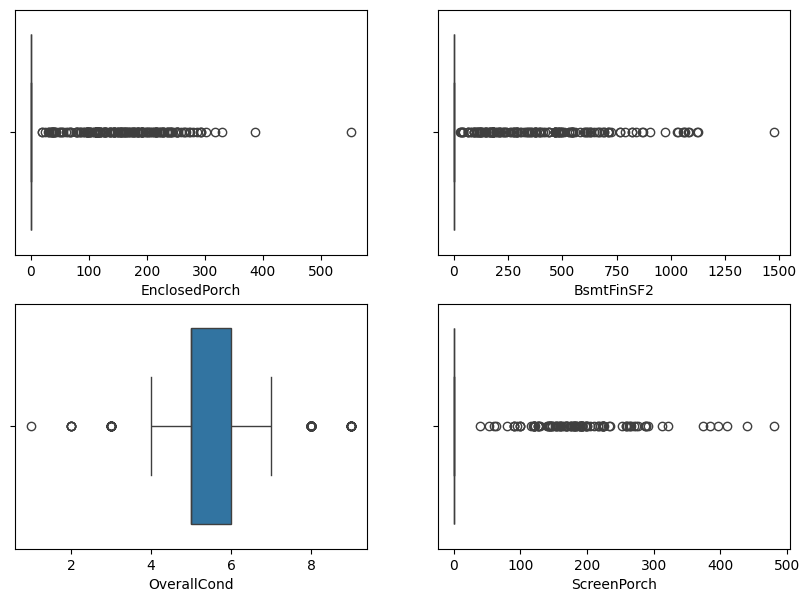

In [391]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Creating boxplots without specifying palette
sns.boxplot(ax=axes[0, 0], data=df, x='EnclosedPorch')
sns.boxplot(ax=axes[0, 1], data=df, x='BsmtFinSF2')
sns.boxplot(ax=axes[1, 0], data=df, x='OverallCond')
sns.boxplot(ax=axes[1, 1], data=df, x='ScreenPorch')

plt.show()

> The graph above helps us identify data points that are far from the data set average and that could potentially be outlets, however, in order to make a decision as to whether they really are or not, the context must be considered. For instance, the feature `OverallCond` Rates the overall condition of the house from 1 to 10 and it´s plausible to have a value 1 or 10. If we analyze other columns with potential outliers we can understand the relationship between `LotArea` and `ScreenPorch` and `EnclosedPorch` areas. 

In [392]:
# identifying whereas the lotarea value is less than enclosedporch value

df['LotArea < EnclosedPorch'] = df['LotArea'] < df['EnclosedPorch']
df['LotArea < EnclosedPorch'].value_counts()


LotArea < EnclosedPorch
False    1460
Name: count, dtype: int64

> After analyzing and comparing the relationship between the total area of ​​the lot and what a porch can be or represent, I was able to notice that in neither case is the area of ​​the porch greater than the total area, so it can be a legitimate value and should not be discarded.

In [393]:
# Dropping 'LotArea < EnclosedPorch' column
df = df.drop(columns=['LotArea < EnclosedPorch'])


### Step 3. Data Exploration

> To begin exploring the data, we are going to use some graphs that allow us to identify the relationship between the columns and find out if there is a correlation between them. To do this, we are going to plot a heat map using just the numeric columns.

In [394]:
# Selecting jsut the numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

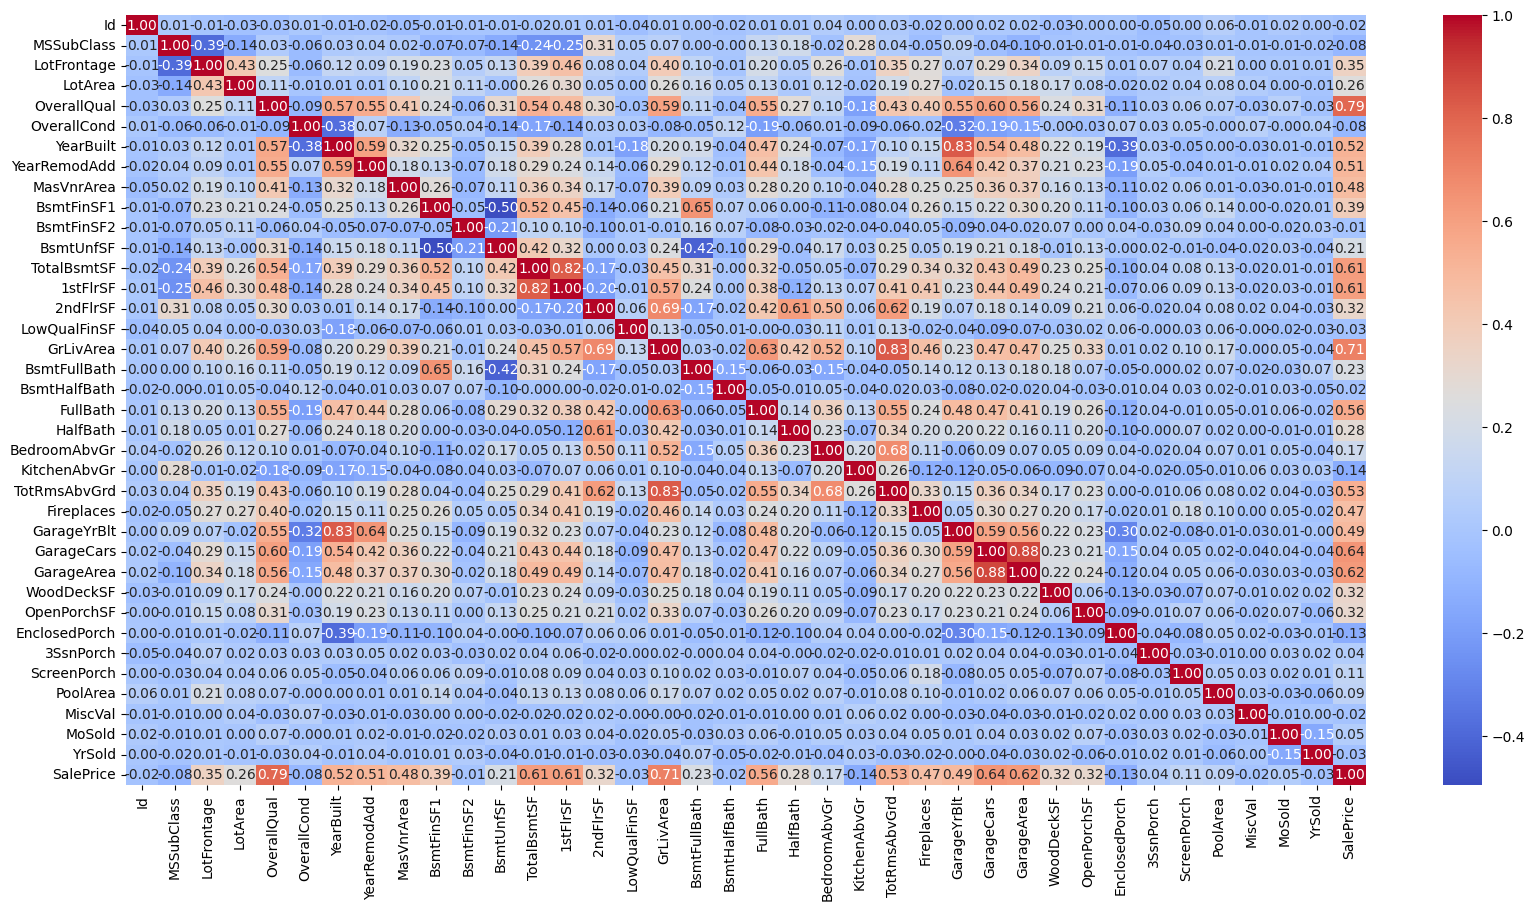

In [395]:
# Checking the correlation between the columns
correlation = df_num.corr()
correlation

# Plotting the heatmap of the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm',  fmt=".2f")
plt.show()

> The previous heat map allows us to identify which columns have high, low or moderate correlation with ``SalePrice`` which is the target variable. To categorize the columns based on their correlation with SalePrice, the following thresholds were used:
* High Positive Correlation: r > 0.7
* Moderate Positive Correlation: 0.3< r ≤ 0.7
* Low Positive Correlation: 0.1< r ≤ 0.3
* Low Negative Correlation: −0.3≤ r < −0.1
* Very Low Correlation (Positive or Negative): −0.1 ≤ r ≤ 0.1

**Some columns that are not strongly related to the target variable might be less useful in predictive modeling and might be candidates for dropping, like the ones in categories ``Low`` and ``Very Low``**

> High Positive Correlation
* OverallQual: 0.79 
* GrLivArea: 0.71
* GarageCars: 0.64
* GarageArea: 0.62
* TotalBsmtSF: 0.61
* 1stFlrSF: 0.61

> Moderate Positive Correlation  
* FullBath: 0.56  
* TotRmsAbvGrd: 0.53  
* YearBuilt: 0.52  
* YearRemodAdd: 0.51  
* GarageYrBlt: 0.53  
* MasVnrArea: 0.48
* Fireplaces: 0.47
* BsmtFinSF1: 0.39
* LotFrontage: 0.35
* WoodDeckSF: 0.32
* 2ndFlrSF: 0.32
* OpenPorchSF: 0.32

> Low Positive Correlation 
* HalfBath: 0.28
* LotArea: 0.25
* BsmtFullBath: 0.23
* BsmtUnfSF: 0.21
* BedroomAbvGr: 0.14

> Low Negative Correlation 
* EnclosedPorch: -0.13
* KitchenAbvGr: -0.14
* MSSubClass: -0.08
* OverallCond: -0.08

> Very Low Correlation (Positive or Negative) 
* YrSold: -0.03
* LowQualFinSF: -0.03
* MiscVal: -0.02
* Id: -0.02
* BsmtHalfBath: -0.02
* MoSold: 0.05
* ScreenPorch: 0.07
* PoolArea: 0.09
* 3SsnPorch: 0.09

**Dropping the columns with low and very low correlation with the target variable:**

In [396]:
columns_to_drop = [
    'LotArea', 'BsmtUnfSF', 'BedroomAbvGr', 'LotFrontage', 'MasVnrArea',# Low Positive Correlation
    'EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'OverallCond',  # Low Negative Correlation
    'YrSold', 'LowQualFinSF', 'MiscVal', 'Id', 'MoSold', 'ScreenPorch', 'PoolArea', '3SsnPorch'  # Very Low Correlation
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)
dftest = dftest.drop(columns=columns_to_drop)

> Now let´s check how correlated the remainin numeric columns are to each other (the moderate and high correlation categories) by doing a Multicollinearity Analysis:

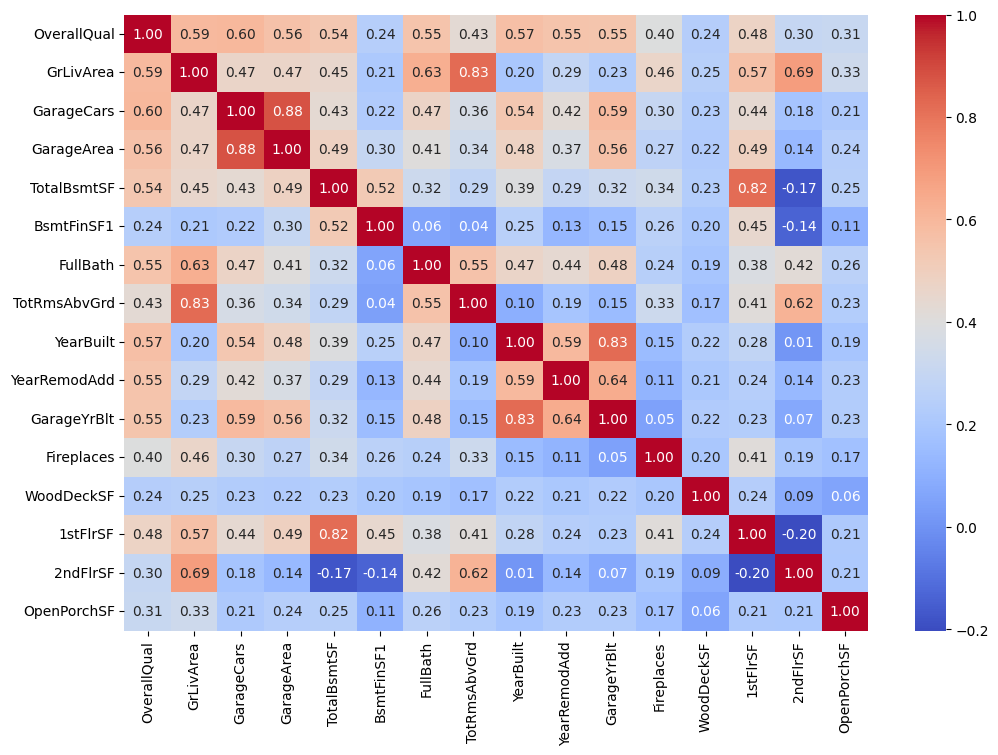

In [397]:
df_num = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'FullBath', 
            'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 
            'WoodDeckSF', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF']


# Plotting the heatmap of the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df[df_num].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

> From the provided heatmap, we can see the following high correlations (above 0.7):

* ``GarageArea`` and ``GarageCars`` (0.88)
* ``GrLivArea`` and ``TotRmsAbvGrd`` (0.83)
* ``GarageYrBlt`` and ``YearBuilt`` (0.83)
* ``GarageYrBlt`` and ``GarageCars`` (0.82)

**Dropping the variables with high multicollinearity:**

In [398]:
# Columns to drop based on multicollinearity analysis
columns_to_drop_multicollinearity = ['GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop_multicollinearity)
dftest = dftest.drop(columns=columns_to_drop_multicollinearity)


**Observations:** 
* Drop GarageArea. The number of cars a garage can hold (GarageCars) might be more directly related to property value and more interpretable.
* Drop TotRmsAbvGrd. GrLivArea provides a continuous measure of space which is more detailed and often more useful in regression models.
* Drop GarageYrBlt. The year the house was built (YearBuilt) usually has more historical and structural significance for the entire property.

> Now let´s analyse the moderate and high correlation columns by plotting a combo graph including histogram, boxplot, and scatterplot.

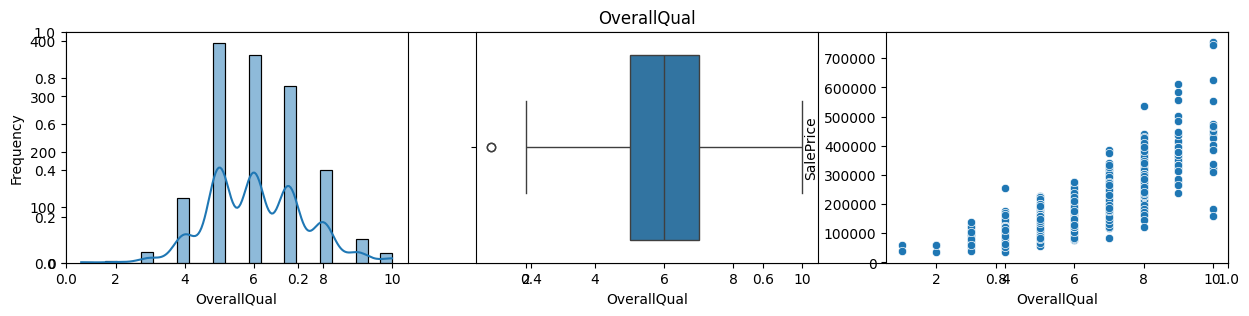

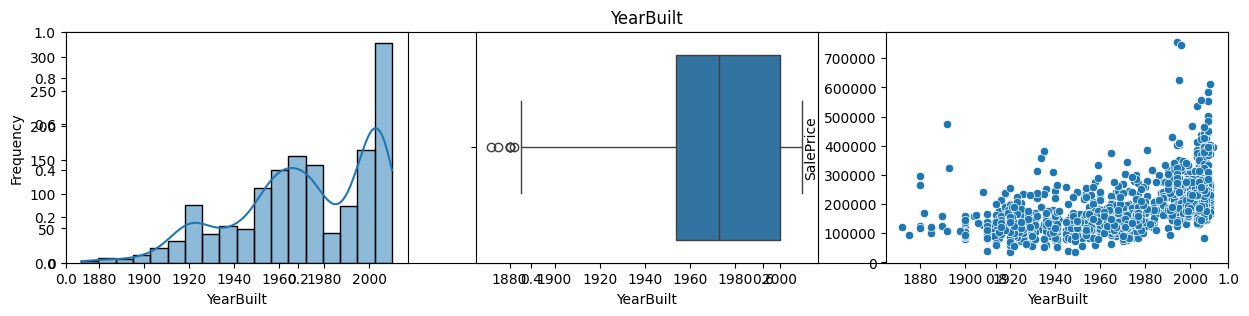

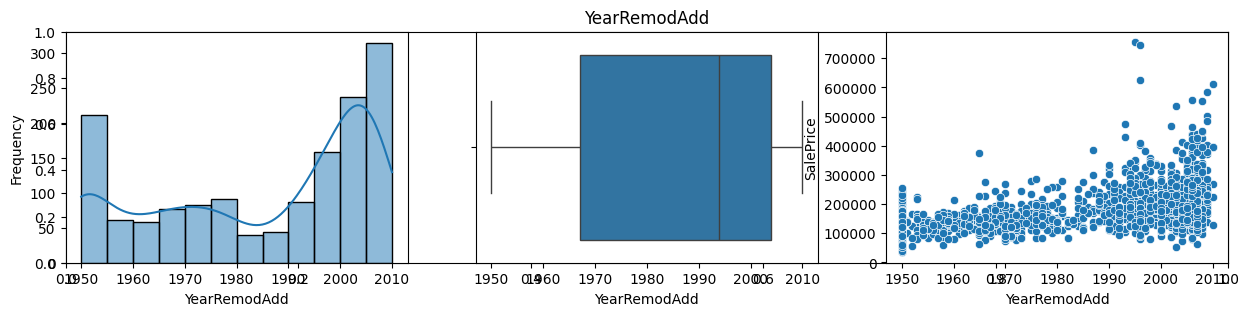

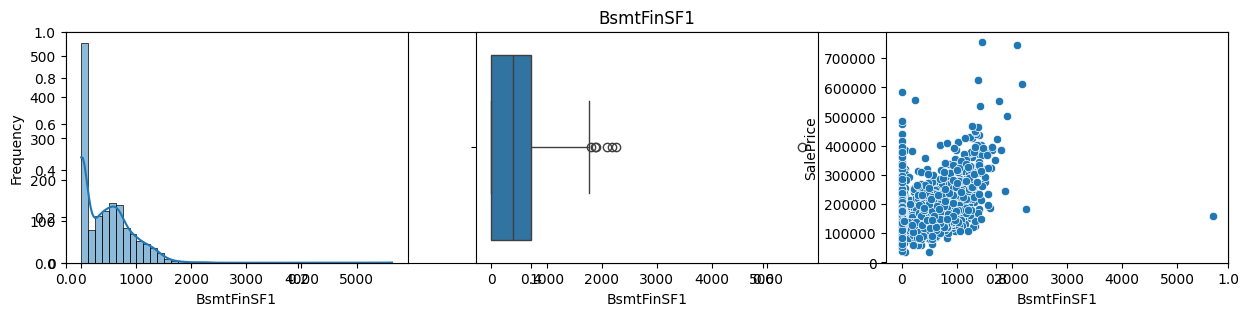

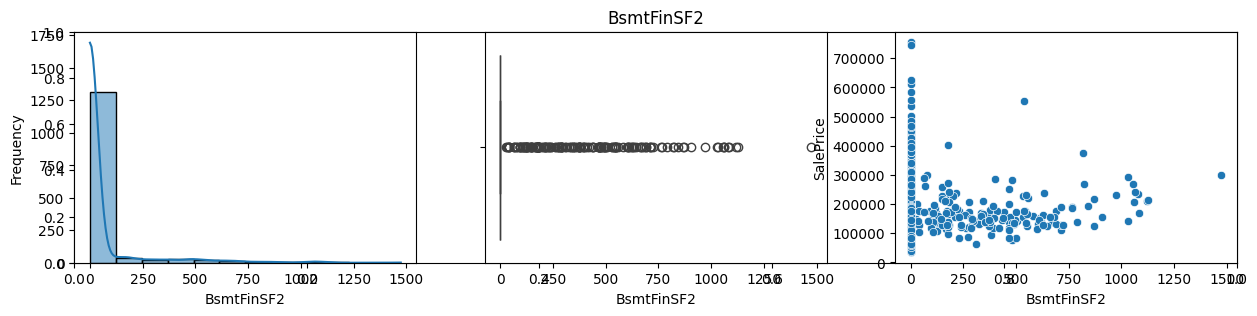

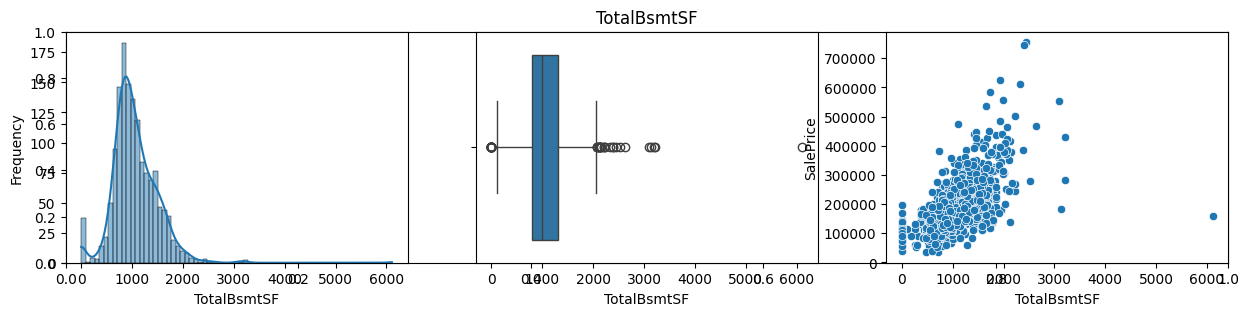

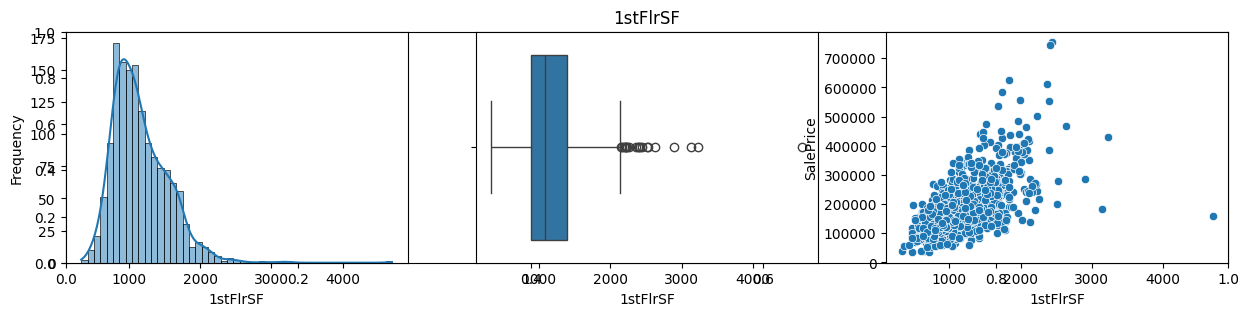

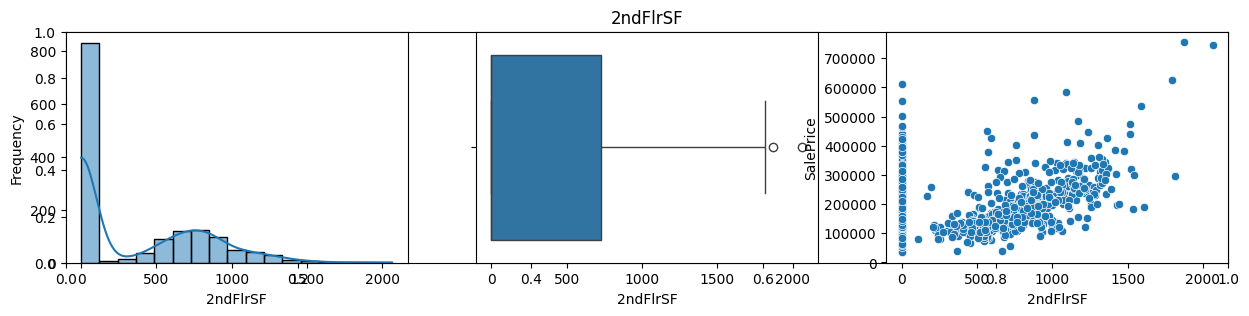

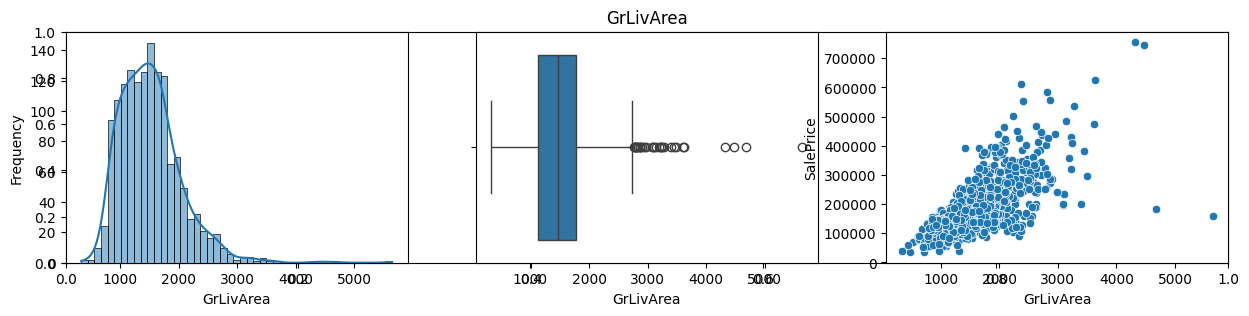

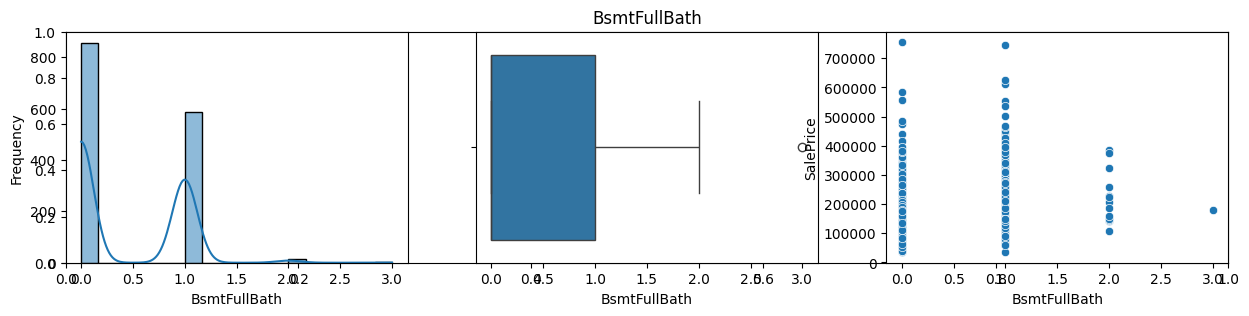

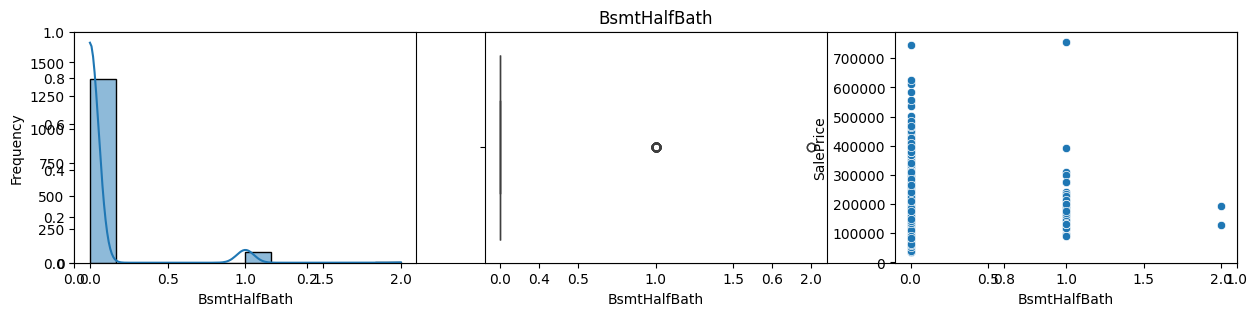

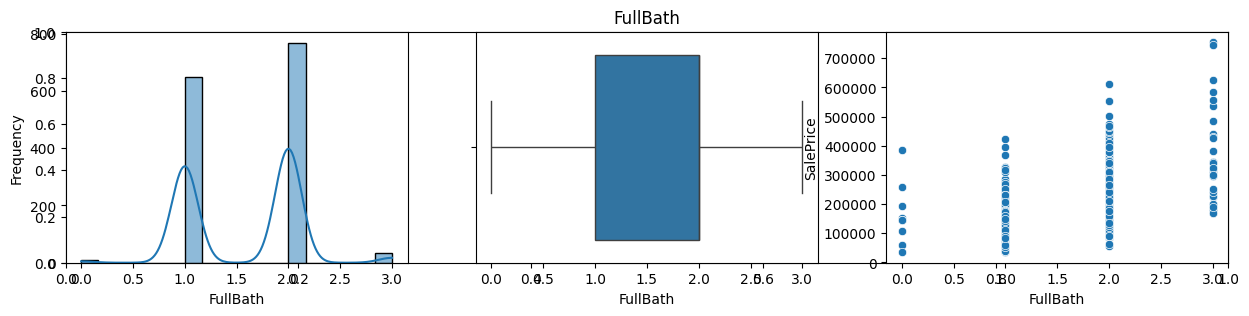

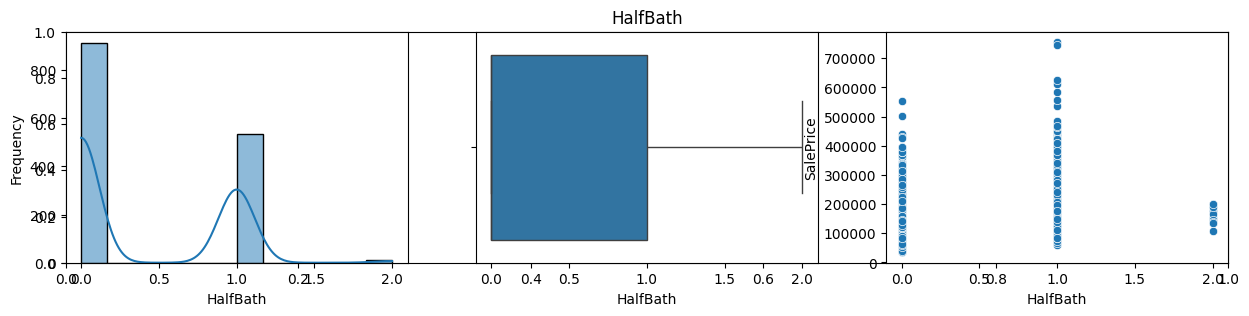

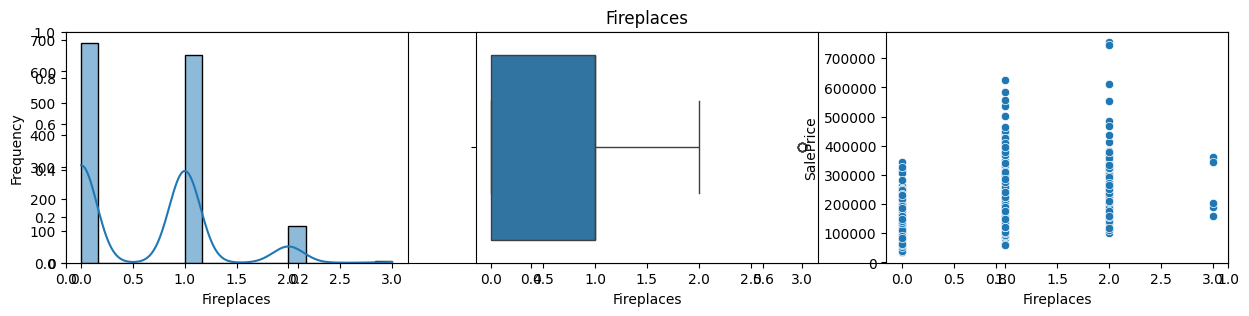

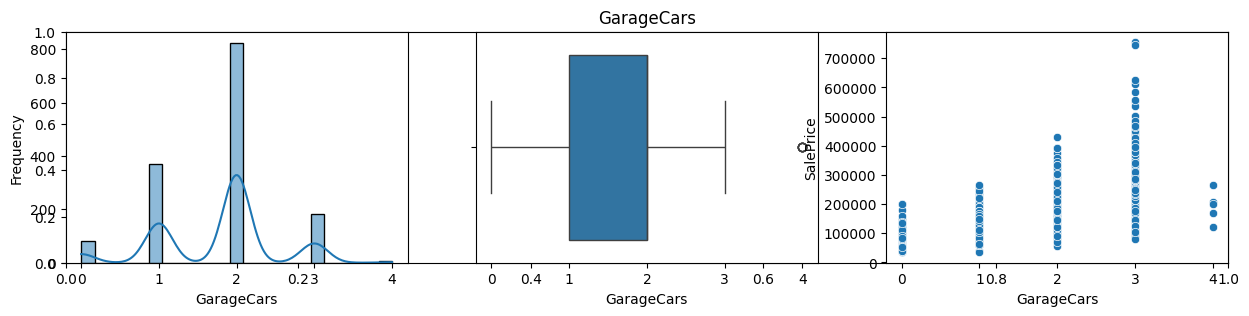

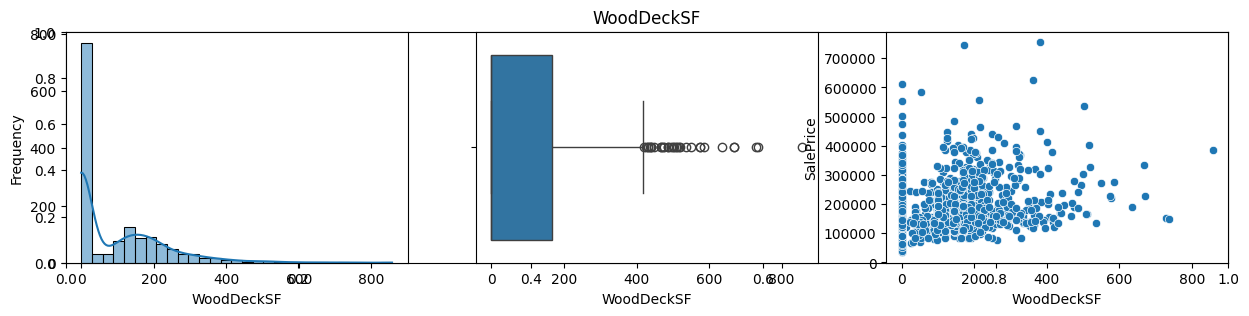

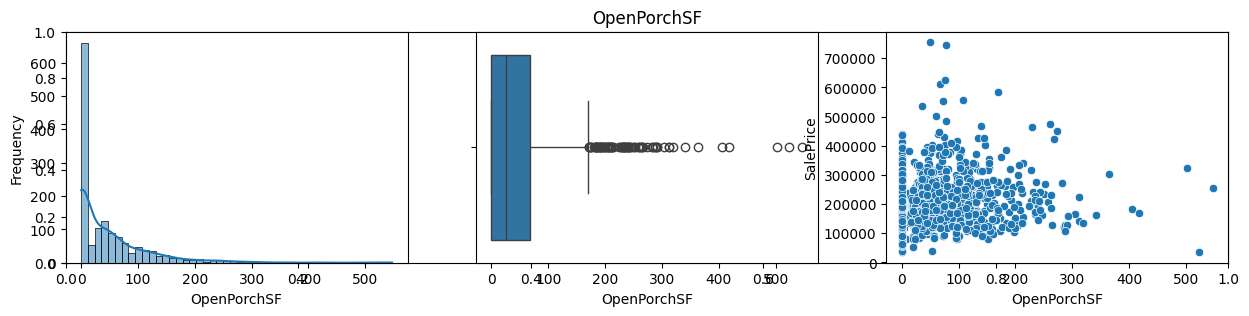

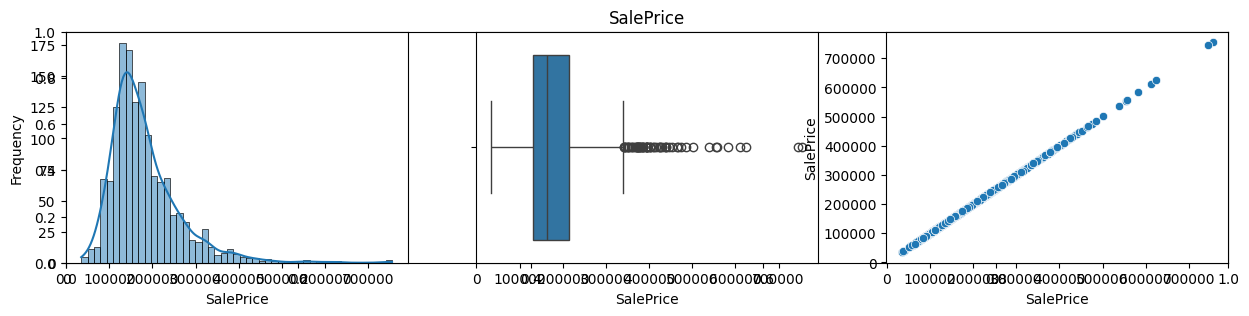

In [399]:
# selecting the numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


# For Numerical Columns
def hist_box_scat_graph(columns_list,df,target_column='SalePrice'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot scatter plot.
    '''
    for col in columns_list:
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.histplot(x = df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col])
        
        plt.subplot(1,3,3)
        sns.scatterplot(x=df[col],y=df[target_column])
        
        plt.show()
        plt.close()

# Plotting the histogram, boxplot and scatter plot for the columns
hist_box_scat_graph(num_cols,df)

**Observations:**

1. If we review the histograms of each of the columns we can see that many of them are highly skewed, so it would be a good idea to apply a normalization in the following steps.
2. Some of these columns have outliers that can be handled later with normalization like ``GrLivArea``, ``GarageArea``, ``TotalBsmtSF``, ``BsmtFinSF1``, ``MasVnrArea``, ``WoodDeckSF``, ``1stFlrSF``, and ``OpenPorchSF``.



> Now, let's take a look and get some insigths of the categorical variables. First, let's check **unique values.**

In [400]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col} - Unique Values: {df[col].unique()}')


MSZoning - Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street - Unique Values: ['Pave' 'Grvl']
LotShape - Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour - Unique Values: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities - Unique Values: ['AllPub' 'NoSeWa']
LotConfig - Unique Values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope - Unique Values: ['Gtl' 'Mod' 'Sev']
Neighborhood - Unique Values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 - Unique Values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 - Unique Values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType - Unique Values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle - Unique Values: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
R

In [401]:
# Checking missing values in the categorical columns for train data
missing = df.select_dtypes(include=['object']).isnull().sum()
missing = missing[missing > 0]
missing_percentage = missing/len(df)*100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_df

Missing Values  Percentage
MasVnrType               872   59.726027
FireplaceQu              690   47.260274
GarageType                81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtFinType1              37    2.534247
Electrical                 1    0.068493

**Observations:**

The `MasVnrType` column contains NaN values where no masonry work is done, so we will fill these with "Notav" to see if this column is useful. Similarly, the `FireplaceQu` column has missing values where there is no fireplace, so we will also fill these with "Notav". We will apply the same approach to the ``Garage`` and ``Basement`` columns, filling missing values with "Notav".

At location 948, the `BsmtExposure` should be filled with "No" because the basement is unfinished, as indicated by the data. We will drop the single row with an empty `Electrical` value. Additionally, at location 332, the `BsmtFinType2` should be filled with "Unf".

In [402]:
# location 948, the `BsmtExposure` should be filled with "No" instead of "notav"
df.loc[948, 'BsmtExposure'] = 'No'

# Filling location 332, the `BsmtFinType2` should be filled with "Unf" instead of "notav"
df.loc[332, 'BsmtFinType2'] = 'Unf'

# Dropping the row with missing value in `Electrical` column
df = df.dropna(subset=['Electrical'])

# Fill the missing values in the categorical columns with 'notav' for train data
columns_to_fill = [
    'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2',
    'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Electrical']
df.fillna({col: 'Notav' for col in columns_to_fill}, inplace=True)
 

> Same for test data

In [403]:
# Checking missing values in the categorical columns for test data
columns_to_fill_test = [
    'MasVnrType', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType'
]

dftest.fillna({col: 'Notav' for col in columns_to_fill_test}, inplace=True) 

In [404]:
# Checking missing values in the categorical columns for test data
missing = dftest.select_dtypes(include=['object']).isnull().sum()
missing = missing[missing > 0]
missing_percentage = missing/len(dftest)*100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)
missing_df

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

In [405]:
# Listing non numerical columns

non_num_cols = df.select_dtypes(include=['object']).columns
non_num_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

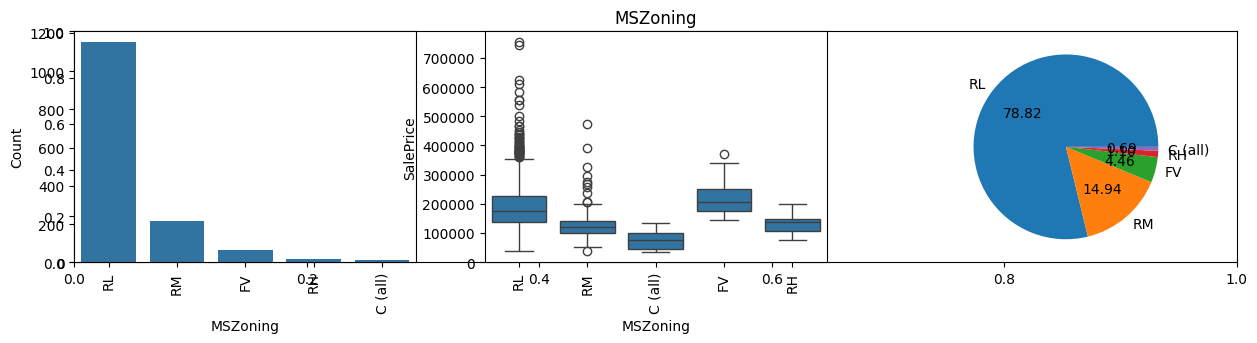

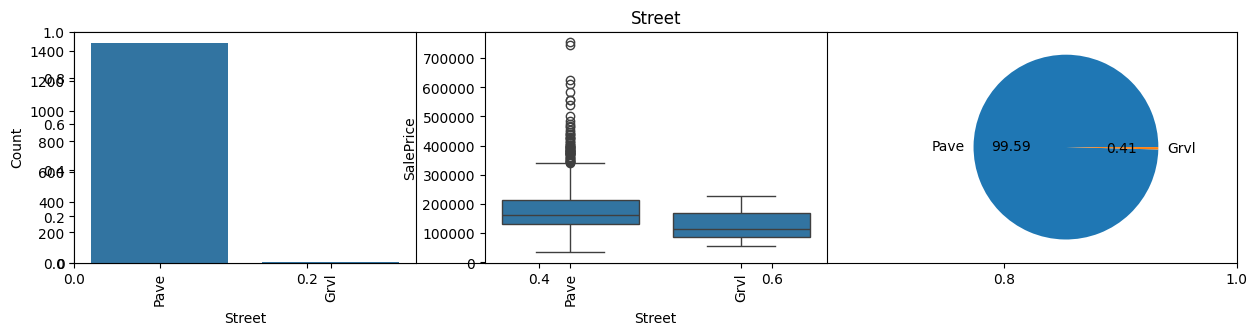

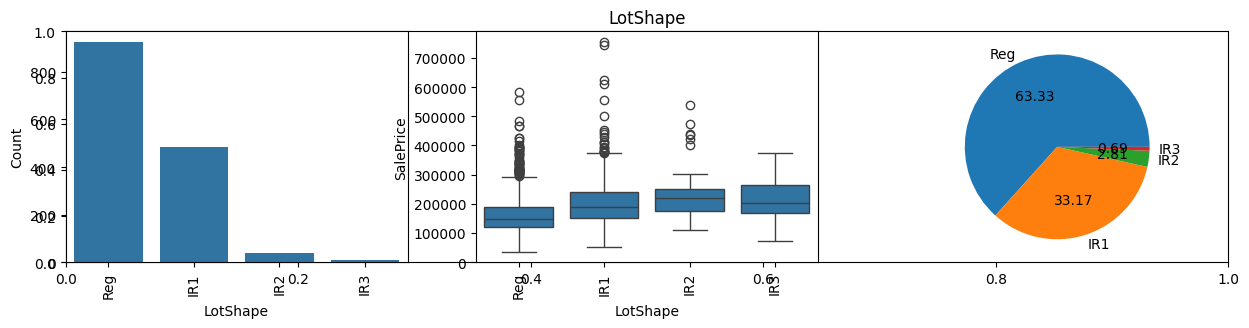

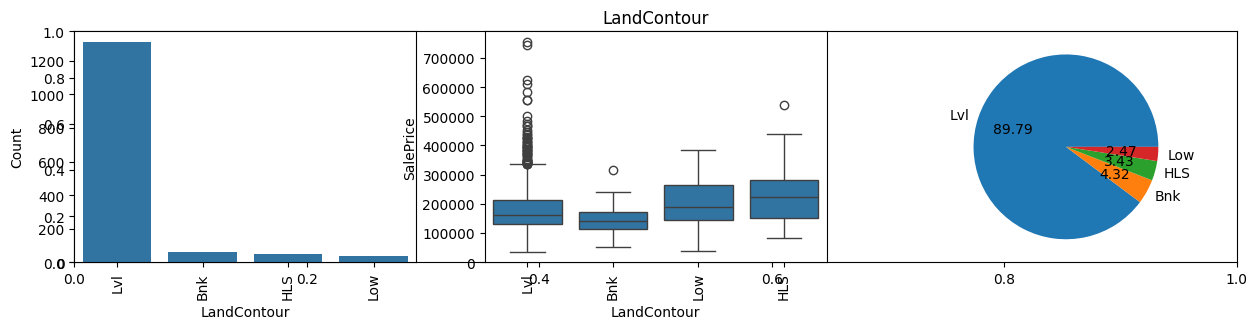

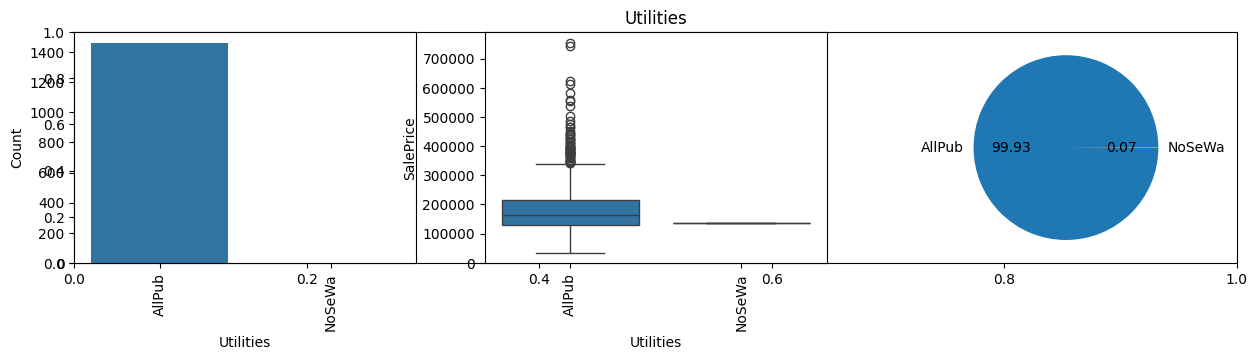

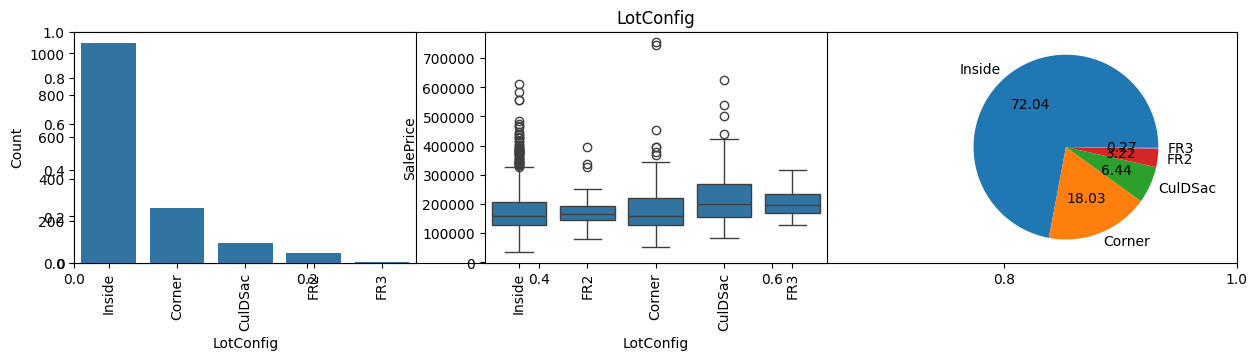

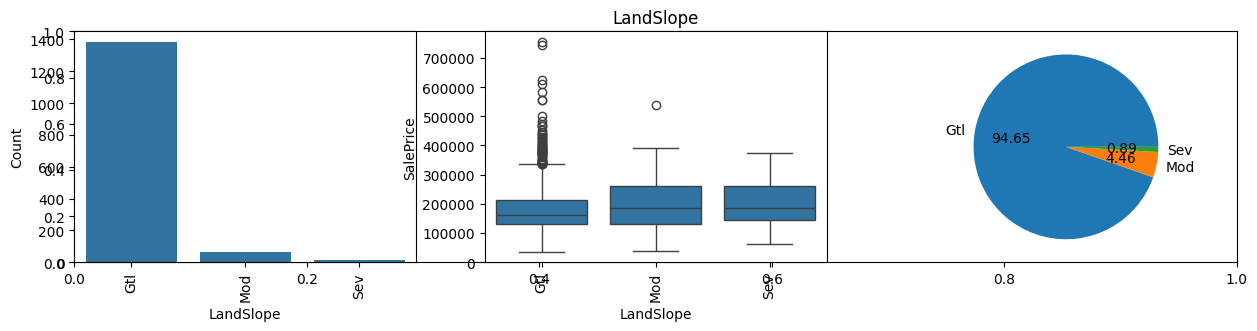

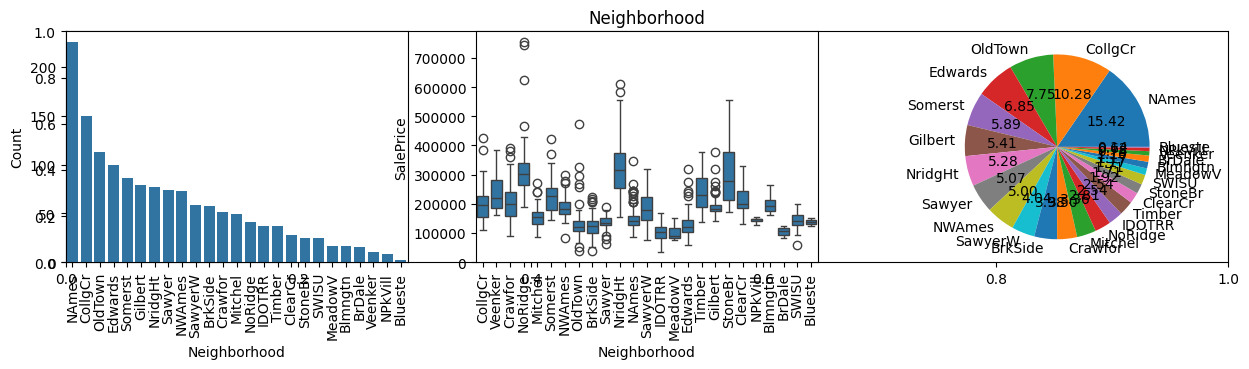

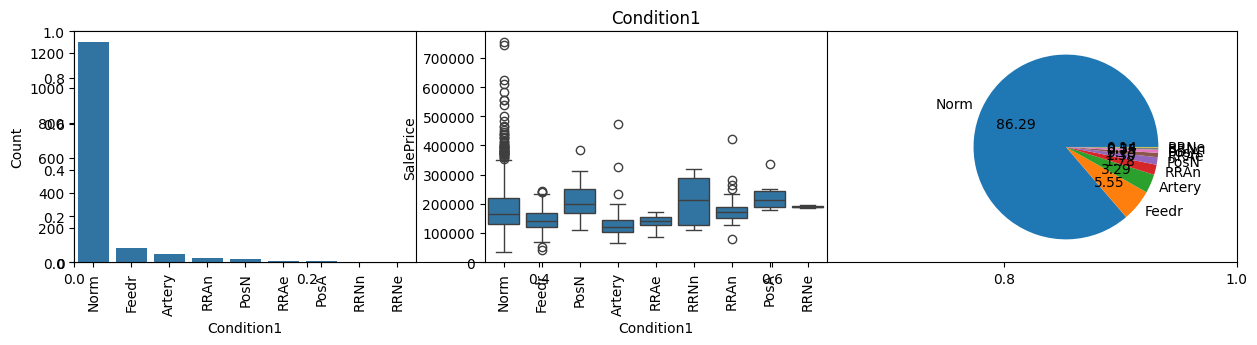

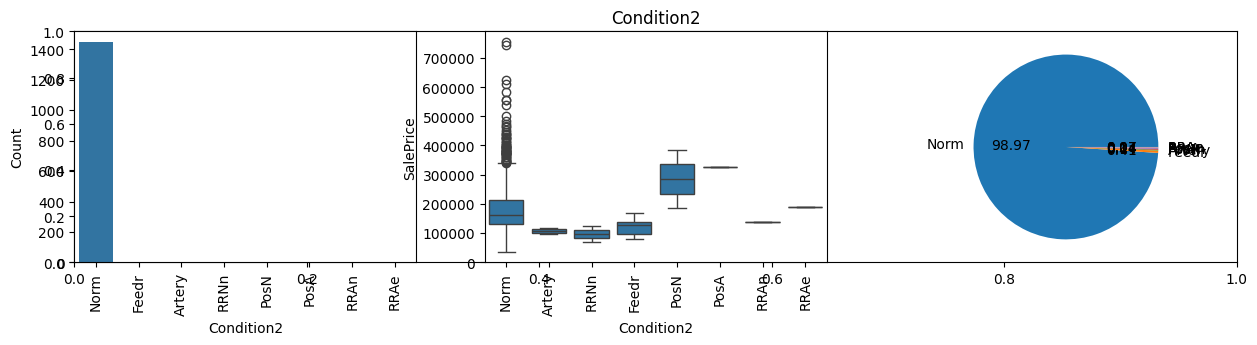

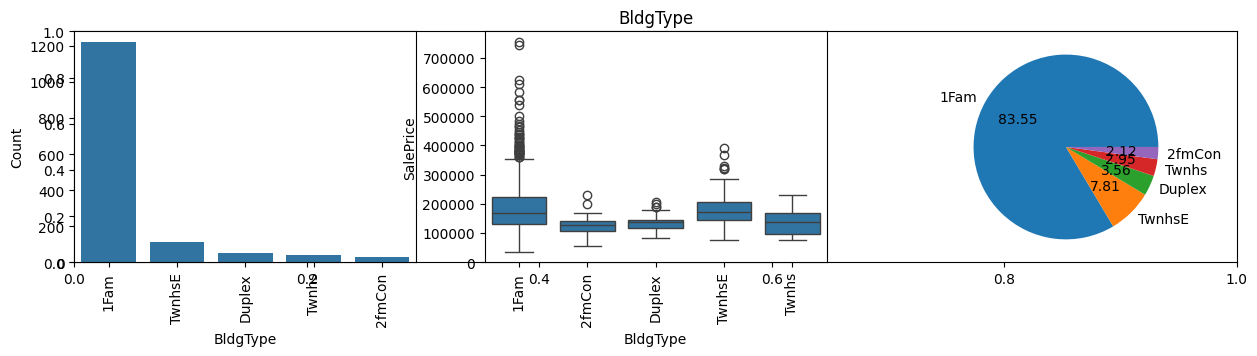

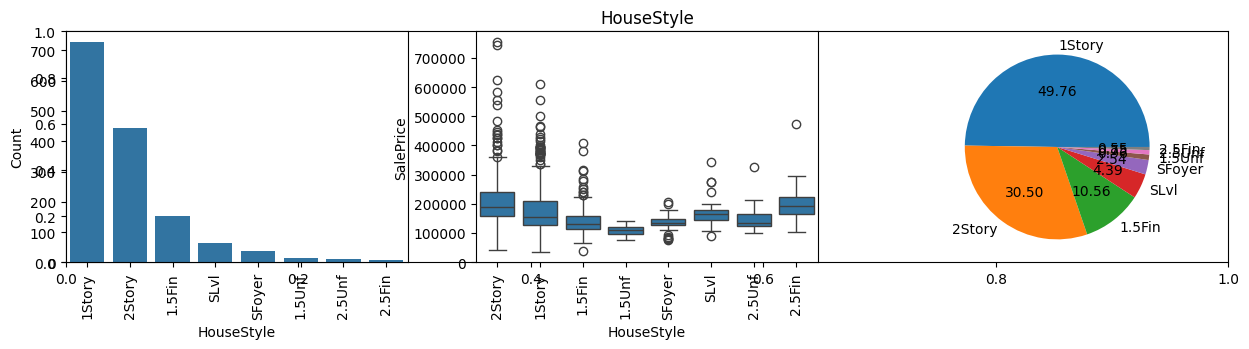

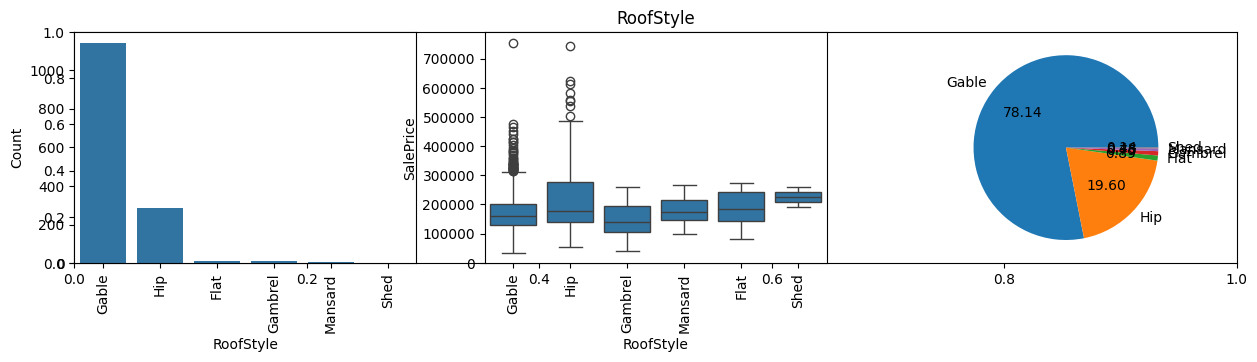

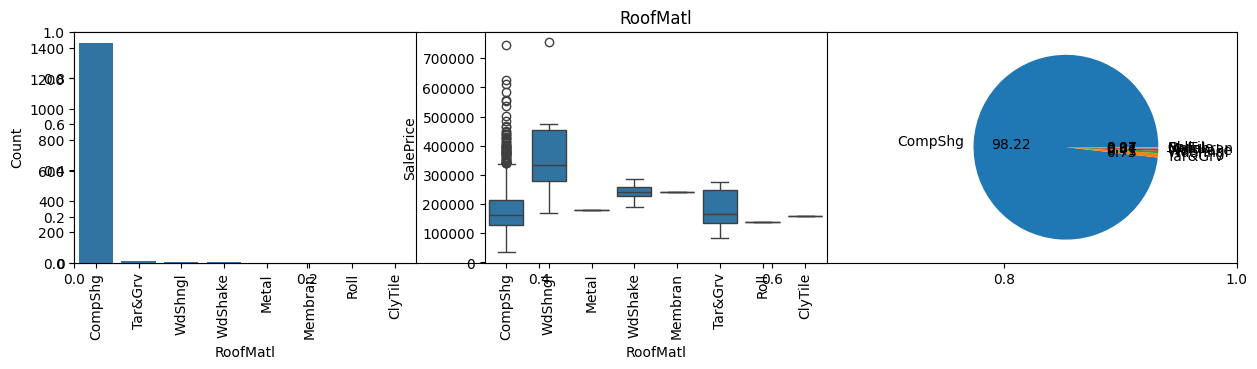

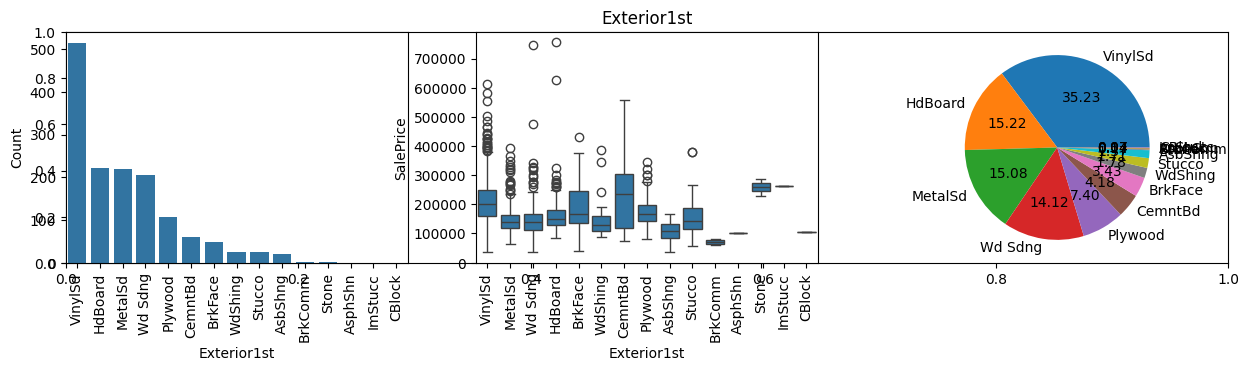

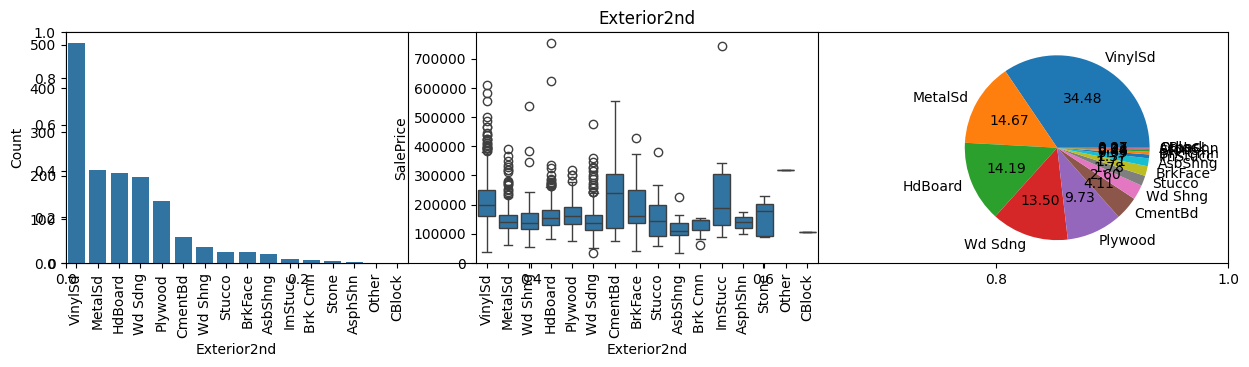

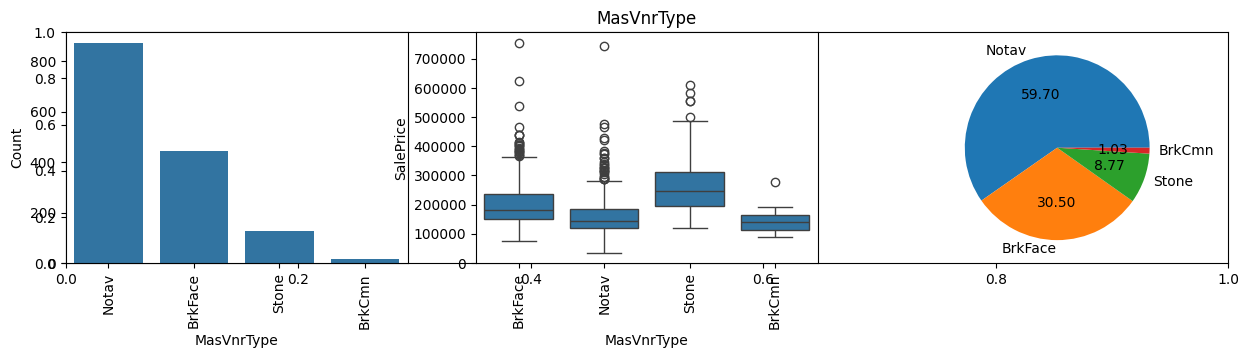

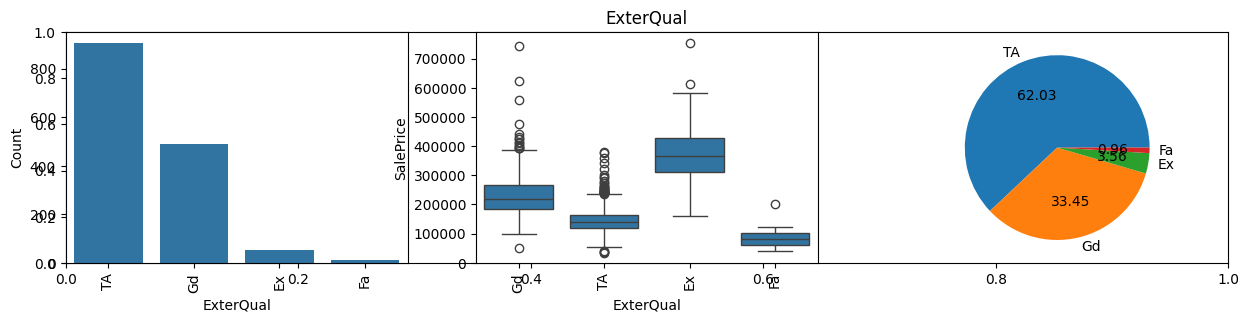

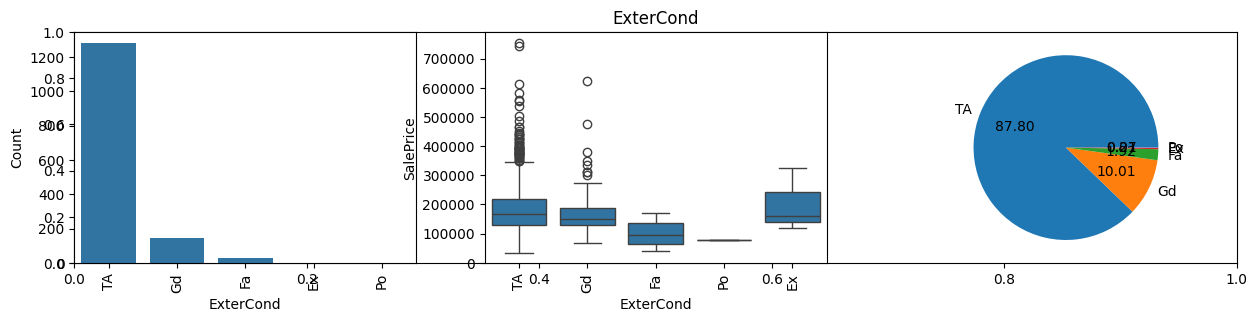

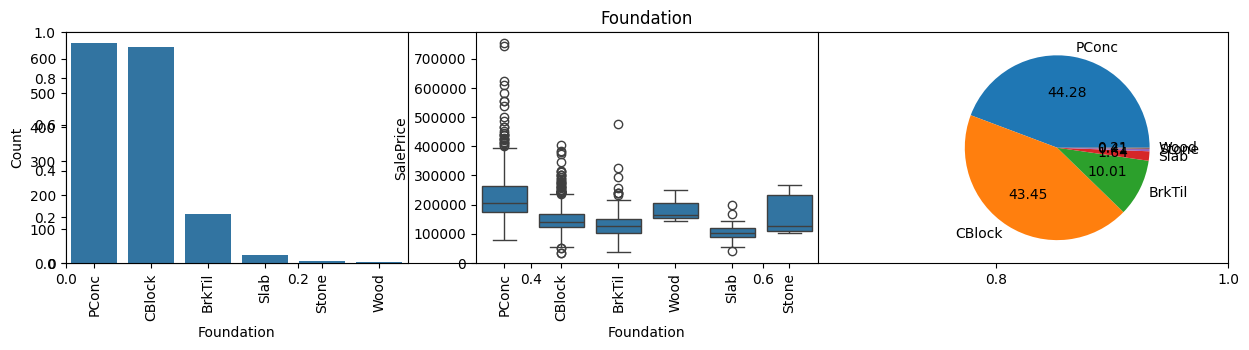

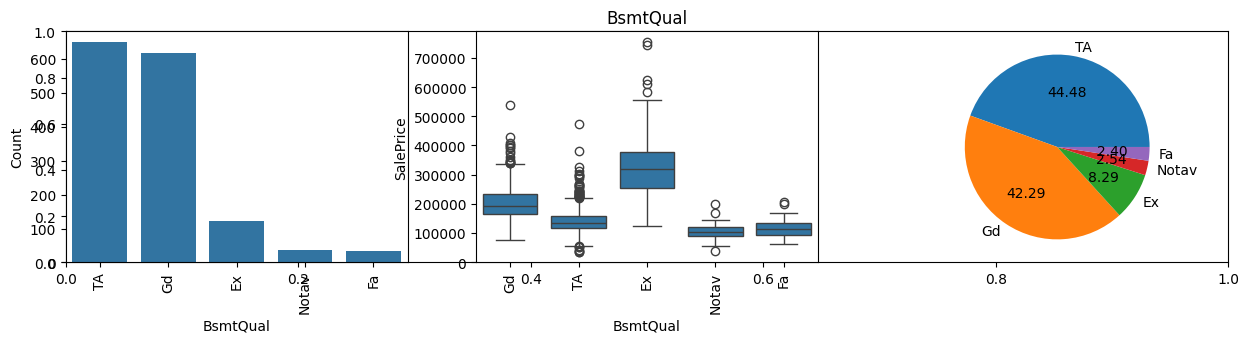

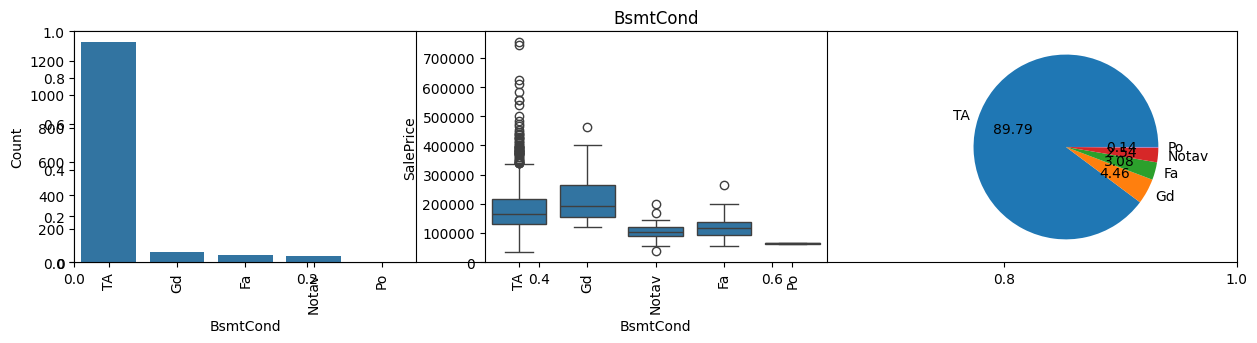

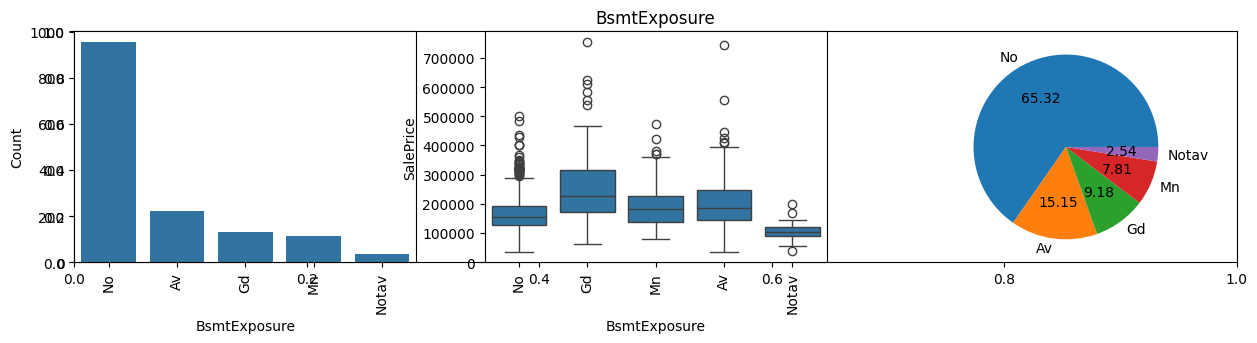

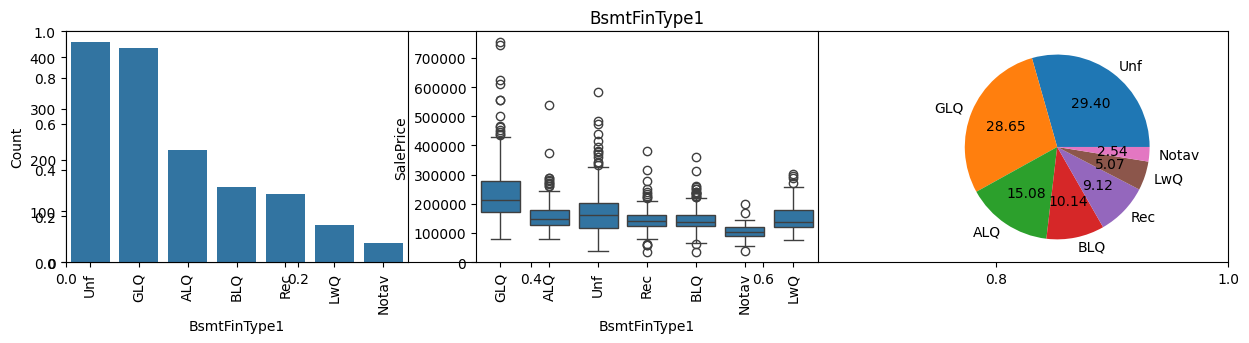

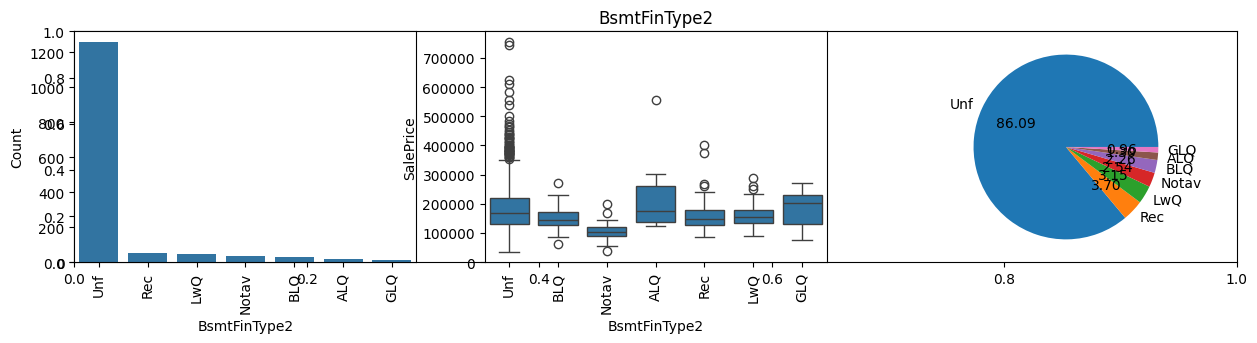

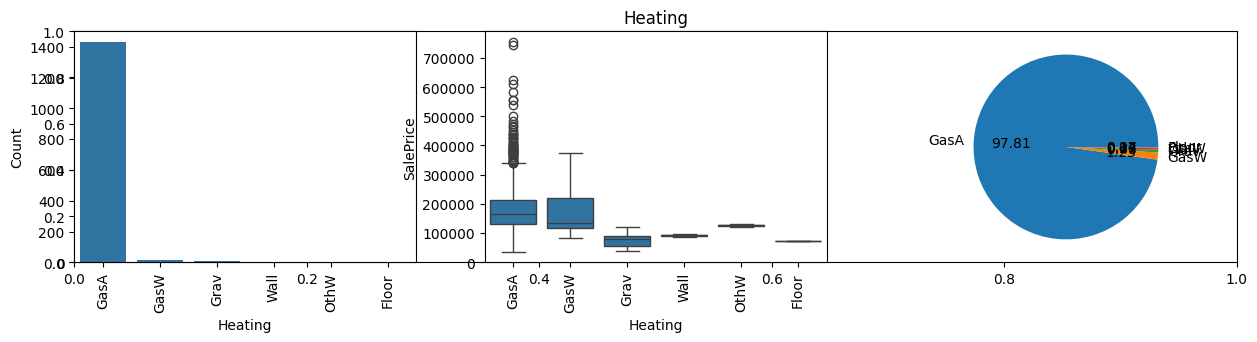

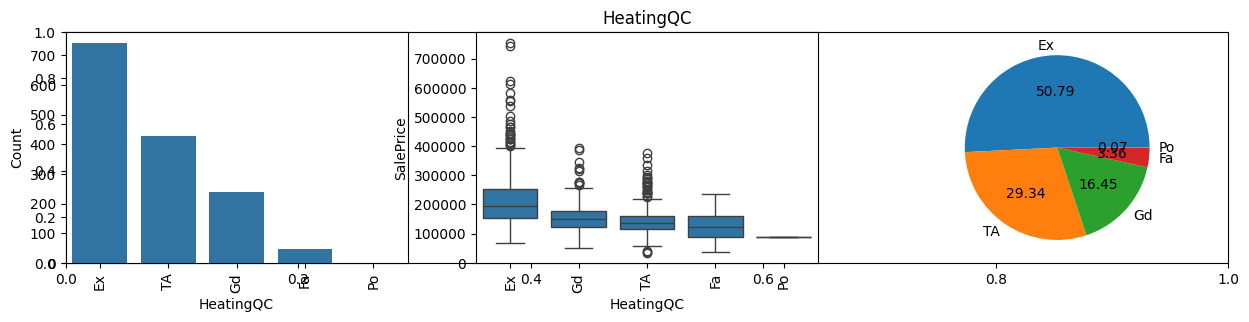

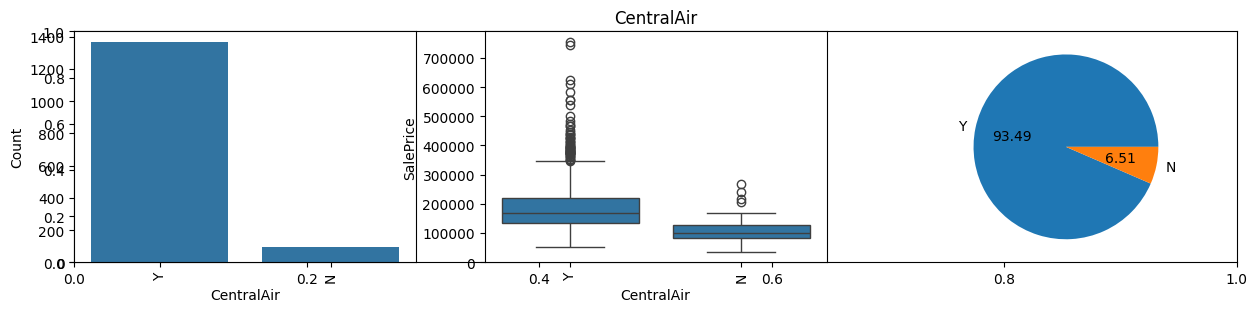

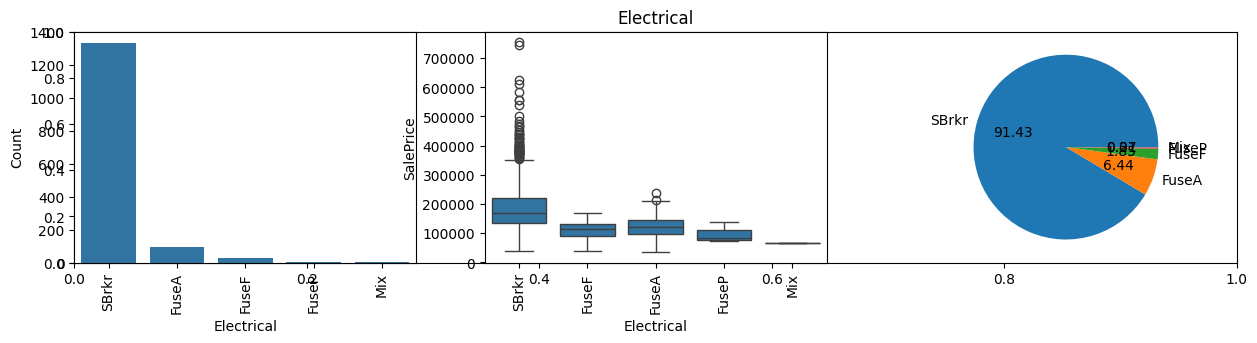

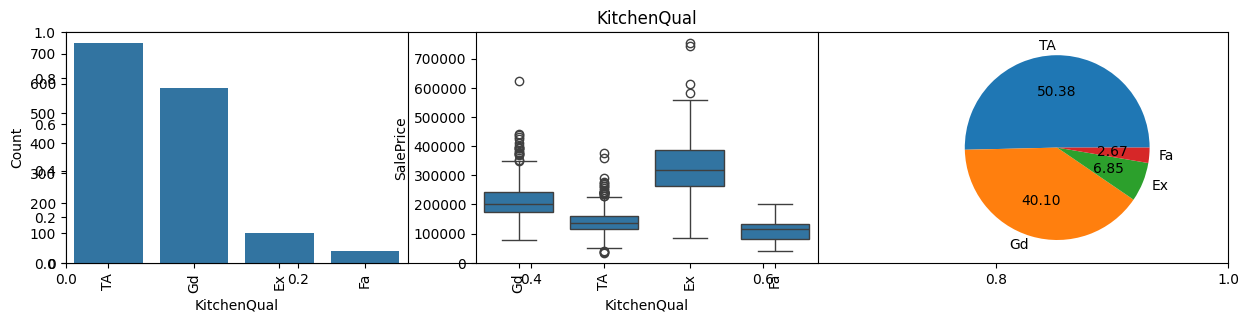

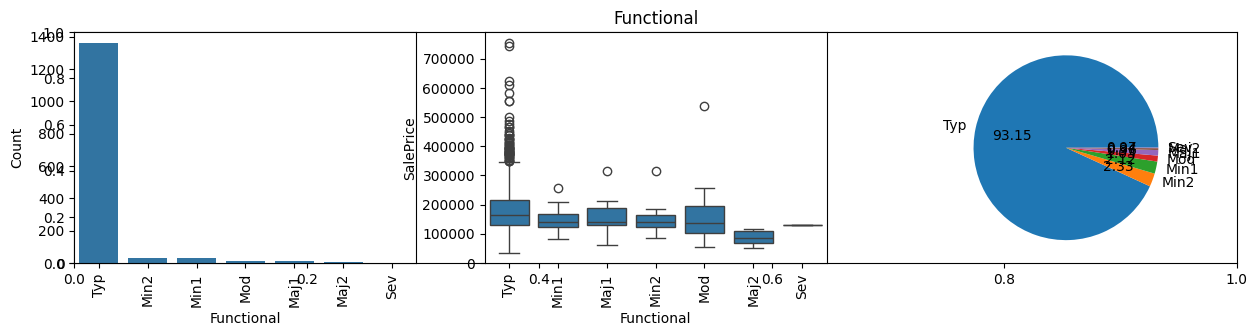

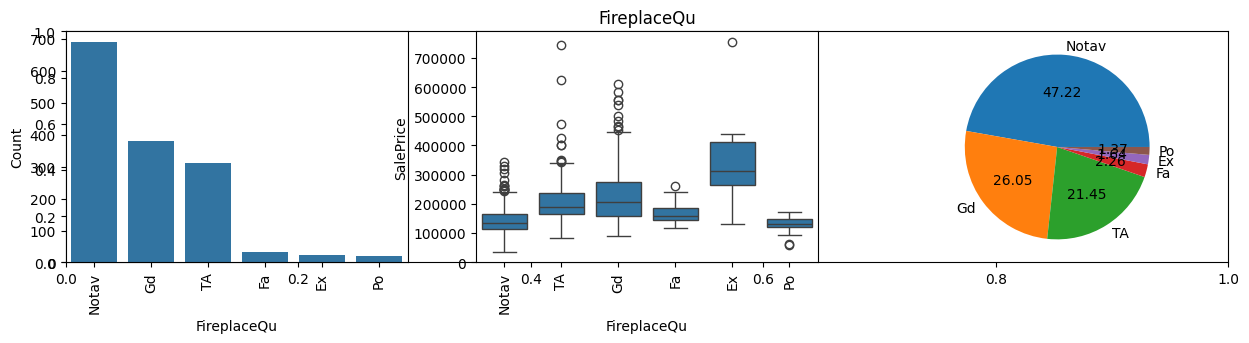

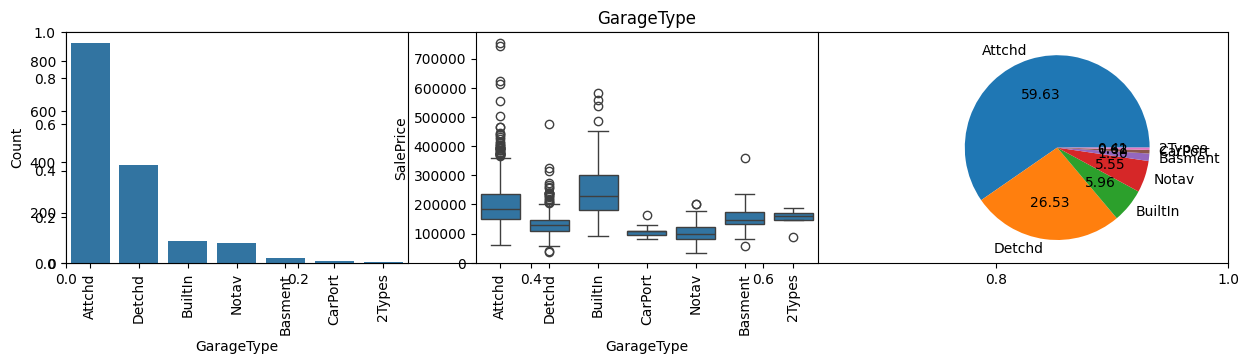

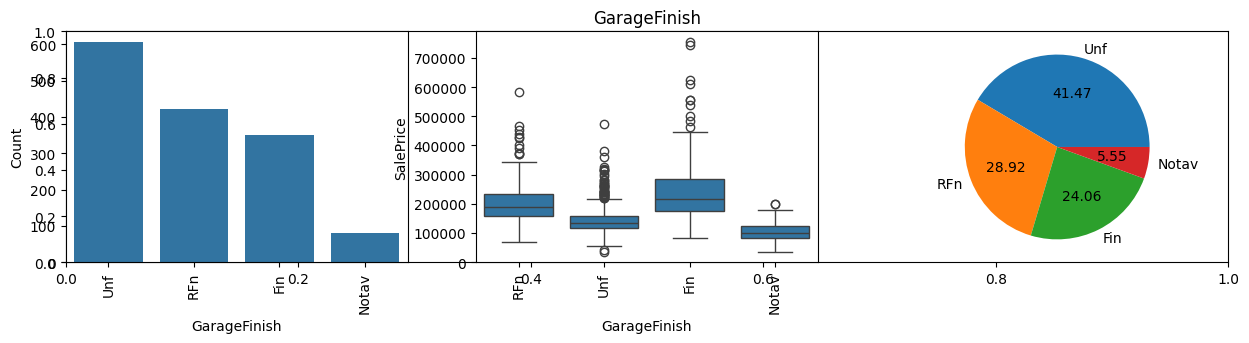

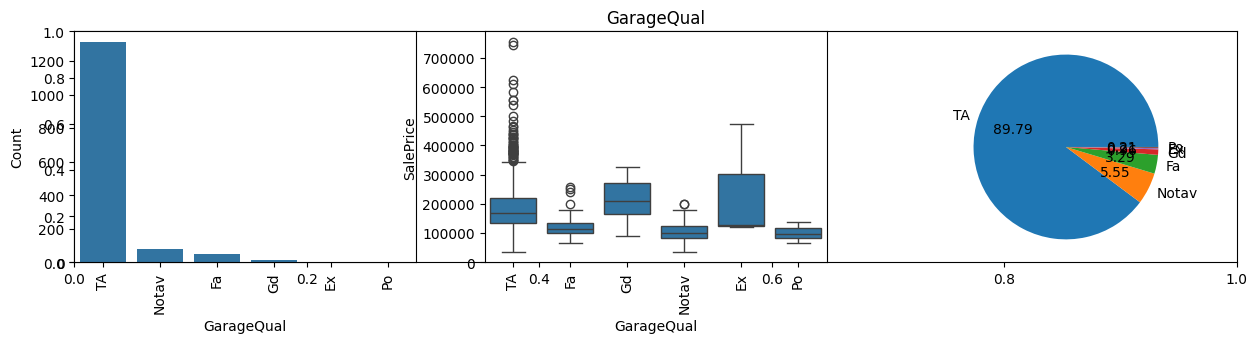

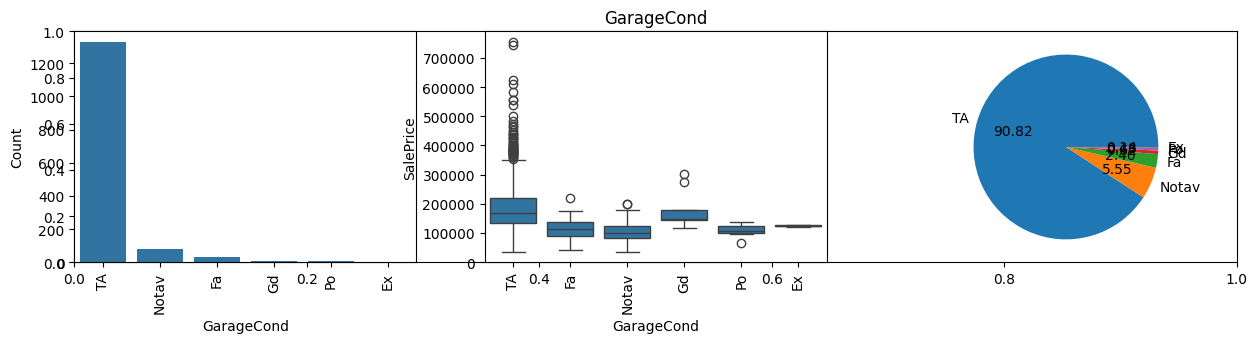

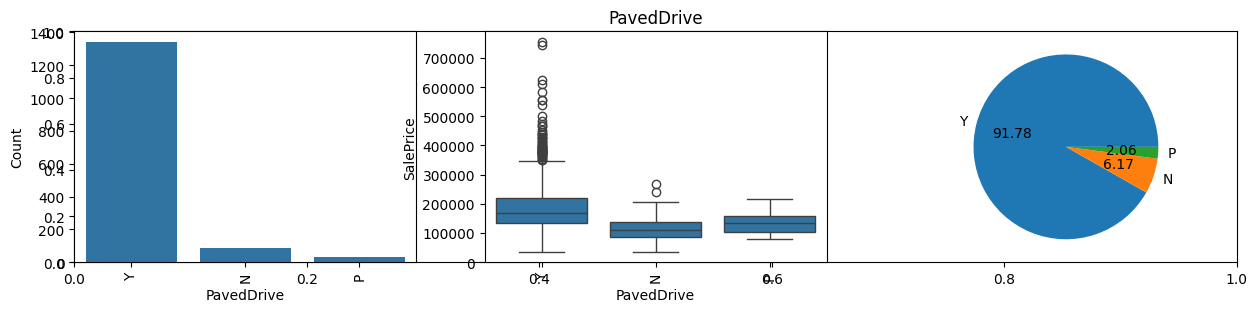

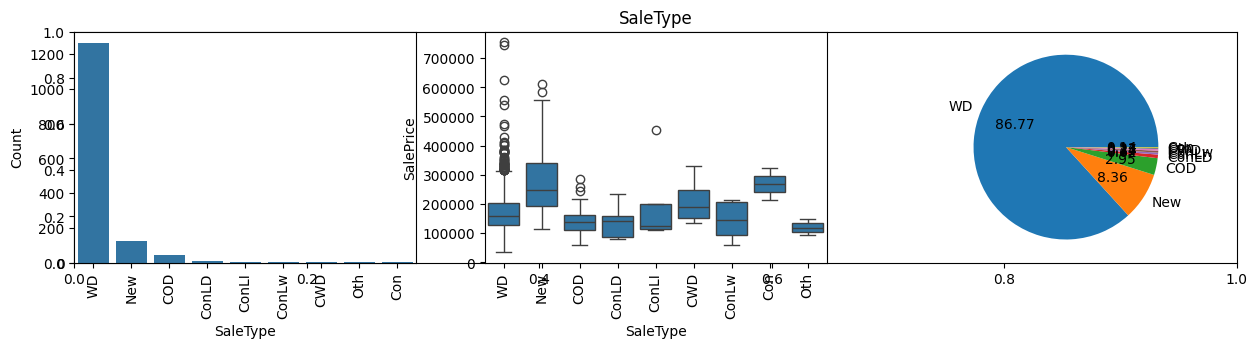

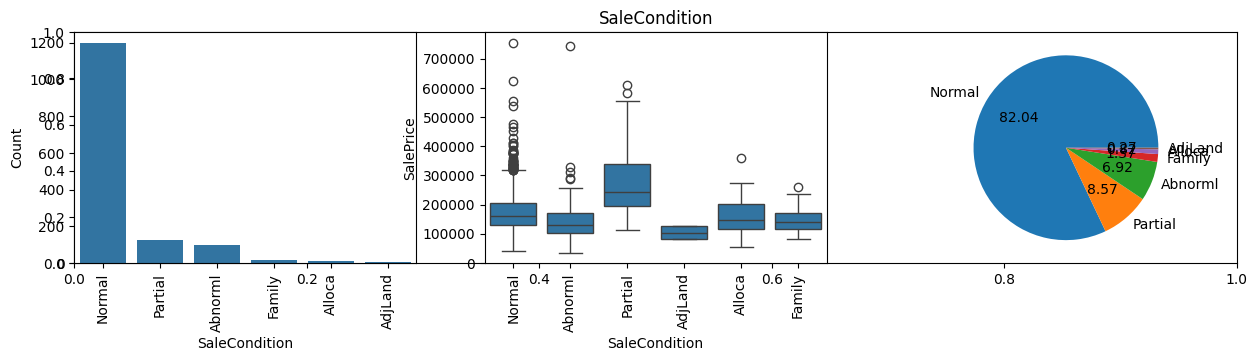

In [406]:
#Function to plot barplot, boxplot and pie chart for the categorical columns

def bar_box_pie_plot(cat_col_list,df,target_column = 'SalePrice'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot boxplot.
    '''
    
    for col in cat_col_list:
        temp = df[col].value_counts().reset_index()
        temp.columns = [col, 'Count']
        
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.barplot(temp,x=col,y='Count')
        plt.xticks(rotation=90)
        
        plt.subplot(1,3,2)
        sns.boxplot(df,x=col,y = target_column)
        plt.xticks(rotation=90)
        
        plt.subplot(1,3,3)
        plt.pie(x = temp['Count'],autopct='%.2f',labels=temp[col])
        plt.show()
        plt.close()

bar_box_pie_plot(non_num_cols,df)

**Observations:**

The most important observation is that several columns are imbalanced. Before dropping some of those columns it is better to do a feature importance analysis to decide. We will do this on further steps.

### Step 4. Feature Engineering

> Before doing any transformation, we would like to review the **skewness** in the data which is a very common problem especially for prices and income. The goal is to know how normalized the data is in its distribution and determine if a transformation is necessary to improve the performance of the model to be implemented. To do this we are going to graph a histogram of the price column.

Skewness: 1.8819429948035529


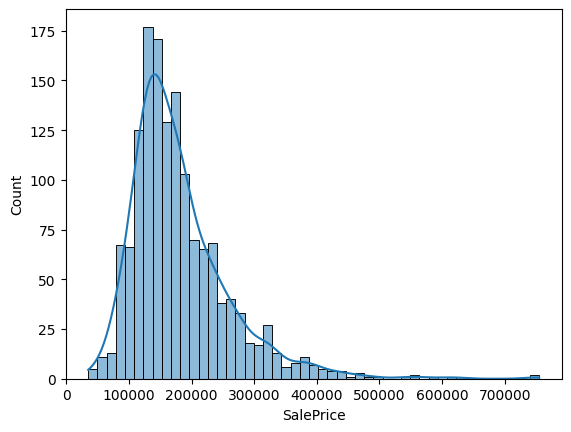

In [407]:
# Checking the skewness of the target column
print(f"Skewness: { df['SalePrice'].skew() }")
sns.histplot(x = df['SalePrice'],kde=True)
plt.show()

> We can infer from the previous graph that having a right-skewed graph to the right would be a good idea for applying a logarithmic transformation.

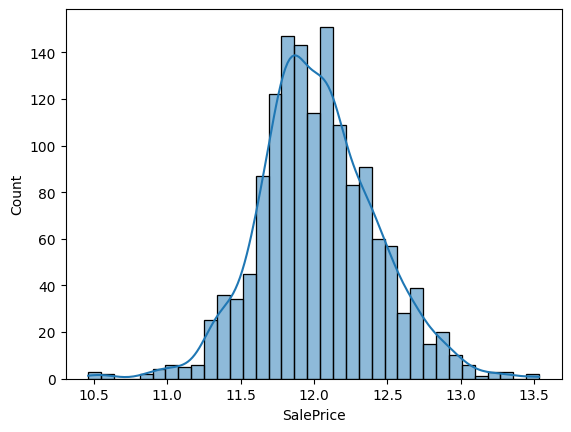

In [408]:
# Apply log transformation
log_sale_price = np.log(df['SalePrice'])

# Plot the transformed data
sns.histplot(log_sale_price, kde=True)
plt.show()

> We have now a more normalized distribution of the target column.

**There are some columns that can be sumed up like baths in above ground ``FullBath`` and baths in basement ``BsmtFullBath``, or ``HalfBath`` and ``BsmtHalfBath``.**

In [409]:
# Summing up FullBath and BsmtFullBath to create a new column TotalBath

df['TotalBath'] = df['FullBath'] + df['BsmtFullBath']
dftest['TotalBath'] = dftest['FullBath'] + dftest['BsmtFullBath']

# Summing up HalfBath and BsmtHalfBath to create a new column TotalHalfBath

df['TotalHalfBath'] = df['HalfBath'] + df['BsmtHalfBath']
dftest['TotalHalfBath'] = dftest['HalfBath'] + dftest['BsmtHalfBath']

# Dropping the columns FullBath, BsmtFullBath, HalfBath and BsmtHalfBath

df = df.drop(columns=['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'])
dftest = dftest.drop(columns=['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'])

``TotalBsmtSF`` is a sum of these Basement columns '``BsmtFinSF1``', '``BsmtFinSF2``'. We will drop these and keep the total.

In [410]:
# Dropping the collumns BsmtFinSF1 and BsmtFinSF2
df = df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'])
dftest = dftest.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'])

Similarly with '``1stFlrSF``', '``2ndFlrSF``' is correlated with ``GrLivArea``.

In [411]:
# Dropping 1stFlrSF and 2ndFlrSF columns

df = df.drop(columns=['1stFlrSF', '2ndFlrSF'])
dftest = dftest.drop(columns=['1stFlrSF', '2ndFlrSF'])

> Now, let's do feature importance for categorical variables. First, we are grouping Ordinal end nominal variables:

In [412]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col} - Unique Values: {df[col].unique()}')

MSZoning - Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street - Unique Values: ['Pave' 'Grvl']
LotShape - Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour - Unique Values: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities - Unique Values: ['AllPub' 'NoSeWa']
LotConfig - Unique Values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope - Unique Values: ['Gtl' 'Mod' 'Sev']
Neighborhood - Unique Values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 - Unique Values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 - Unique Values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType - Unique Values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle - Unique Values: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
R

Quality and condition Columns with categories as ['Notav','Po','Fa','TA','Gd','Ex']:

1.	ExterCond: Unique Values: ['TA', 'Gd', 'Fa', 'Po', 'Ex']
2.	BsmtQual: Unique Values: ['Gd', 'TA', 'Ex', 'Notav', 'Fa']
3.	BsmtCond: Unique Values: ['TA', 'Gd', 'Notav', 'Fa', 'Po']
4.	HeatingQC: Unique Values: ['Ex', 'Gd', 'TA', 'Fa', 'Po']
5.	KitchenQual: Unique Values: ['Gd', 'TA', 'Ex', 'Fa']
6.	FireplaceQu: Unique Values: ['Notav', 'TA', 'Gd', 'Fa', 'Ex', 'Po']
7.	GarageQual: Unique Values: ['TA', 'Fa', 'Gd', 'Notav', 'Ex', 'Po']
8.	GarageCond: Unique Values: ['TA', 'Fa', 'Notav', 'Gd', 'Po', 'Ex']

The remaining columns are ``nominal`` and since these are primarily informational and do **not provide significant predictive power.**

In [413]:
# Creating a list of ordinal and nominal variables
ordinal_variables = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

nominal_variables_drop = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'PavedDrive',     
                     'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                     'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']

In [414]:
# Dropping the nominal variables

df = df.drop(columns=nominal_variables_drop)
dftest = dftest.drop(columns=nominal_variables_drop)


In [415]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

ordinal_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Notav': 0
}

# Prepare categories for OrdinalEncoder
categories = [list(ordinal_mapping.keys()) for _ in ordinal_variables]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=categories)

# Apply Ordinal Encoding to the DataFrame
df[ordinal_variables] = encoder.fit_transform(df[ordinal_variables])
dftest[ordinal_variables] = encoder.transform(dftest[ordinal_variables])

In [416]:
df[ordinal_variables].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0        1.0        2.0       1.0       2.0        0.0          1.0   
1        2.0        2.0       1.0       2.0        0.0          2.0   
2        1.0        2.0       1.0       2.0        0.0          1.0   
3        2.0        2.0       2.0       1.0        1.0          1.0   
4        1.0        2.0       1.0       2.0        0.0          1.0   

   FireplaceQu  GarageQual  GarageCond  
0          5.0         2.0         2.0  
1          2.0         2.0         2.0  
2          2.0         2.0         2.0  
3          1.0         2.0         2.0  
4          2.0         2.0         2.0

In [417]:
df.shape

(1459, 21)

In [418]:
dftest.shape

(1459, 20)

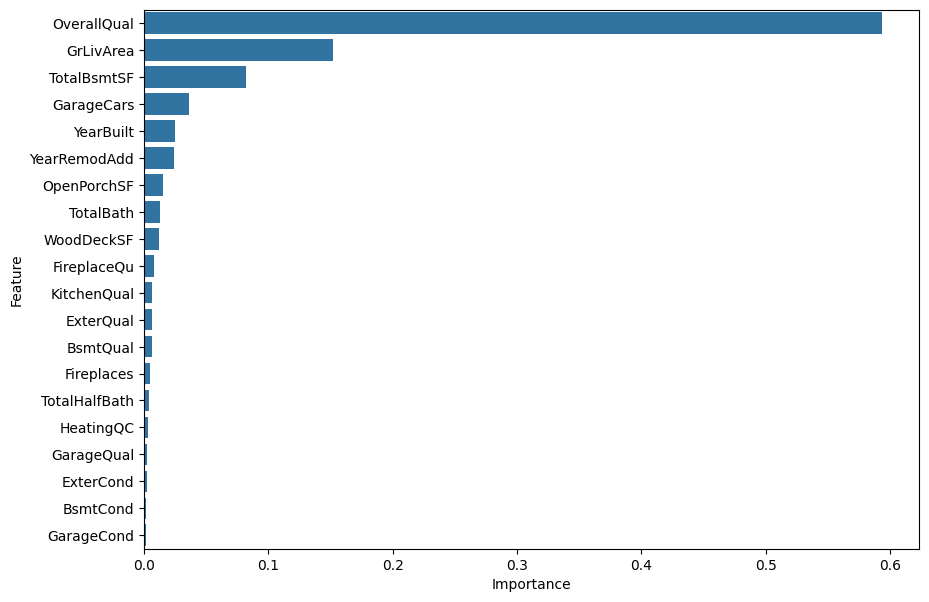

In [419]:
# Ramdom Forest Feature Importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into X and y
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Splitting the dataset into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature')
plt.show()




##### Scaling the data

> Before continuing it will be a good idea to scale the data given that I have different scales and I want them to contibute equally during the model trainning.

> There are two common scaling methods:
>* StandardScaler: This method standardizes features by removing the mean and scaling to unit variance. It's a good choice when the features have different scales and you want them to contribute equally during model training.
>* MinMaxScaler: This method scales each feature to a range between 0 and 1 (or a custom range you specify). It can be useful when the data has outliers or when the features have significantly different scales, but you want to preserve the original distribution of the data.

**Reference:** [https://www.analyticsvidhya.com/blog/2020/12/feature-engineering-feature-improvements-scaling/](https://www.analyticsvidhya.com/blog/2020/12/feature-engineering-feature-improvements-scaling/)

In [420]:
# Importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 5. Model Selection

> At this point, we have to consider the metrics we will use to determine which model is a better fit to predict house price.  
For regression problems and models three metrics are suitable: `Mean Squared Error MSE`, `Root Mean Squared Error RMSE`, and `R Squared R2`.

> **Reference:**  [https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [421]:
# implementing a linear regression model
from sklearn.metrics import mean_squared_error, r2_score

# Data Pipleine

'''So here we are going to create a function that will take in a model and fit it to the training data and then make predictions on the testing data.
The function will also evaluate the model using the mean squared error, root mean squared error and the R2 score.'''

def fit_model (model):

    # Fitting the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model with the MSE, RMSE and R2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results = pd.DataFrame({'Model': [model], 'Mean Squared Error': [mse], 'Root Mean Squared Error': [rmse], 'R2 Score': [r2]})
    return results


In [422]:
# implementing a decision tree model
from sklearn.tree import DecisionTreeRegressor

# Creating an instance of the model
model2 = DecisionTreeRegressor()

# Fitting the model
fit_model(model2)

Model  Mean Squared Error  Root Mean Squared Error  \
0  DecisionTreeRegressor()        1.516315e+09             38939.894629   

   R2 Score  
0  0.759453

In [423]:
# implementing a random forest model
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the model
model3 = RandomForestRegressor()

# Fitting the model
fit_model(model3)

Model  Mean Squared Error  \
0  (DecisionTreeRegressor(max_features=1.0, rando...        7.971142e+08   

   Root Mean Squared Error  R2 Score  
0             28233.210435  0.873547

In [424]:
# implementing a linear regression model
from sklearn.linear_model import LinearRegression

# Creating an instance of the model
model1 = LinearRegression()

# Fitting the model
fit_model(model1)

Model  Mean Squared Error  Root Mean Squared Error  R2 Score
0  LinearRegression()        9.784702e+08             31280.507736  0.844776

> From the previous training step we got a higher score while evaluating the ``Random Forest Regressor`` as follows:  
* `MSE: `  7.790930e+08
* `RMSE:` 27912.237195
* `R2:` 0.876405

> In conclusion, the Random Forest Regressor model performs better than the others.

### Step 6. Hyperparameter Tuning

In [425]:
# Implementing Grid Search CV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [426]:
%%time
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
CPU times: total: 2.41 s
Wall time: 1min 53s


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [427]:
# Get the best parameters
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [428]:
# Create a new model with the best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_)
fit_model(best_rf)


Model  Mean Squared Error  \
0  (DecisionTreeRegressor(max_depth=30, max_featu...        7.871567e+08   

   Root Mean Squared Error  R2 Score  
0              28056.31359  0.875126

### Step 7. Picling the model

In [429]:
# Picling the model

import pickle

# Save the model
with open('best_rf.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [430]:
#Saving dftest to csv

dftest.to_csv('dftest.csv', index=False)


In [432]:
# use the model to make predictions on the test data
dftest = pd.read_csv('dftest.csv')

# Scale the test data
dftest = scaler.transform(dftest)

# Make predictions
predictions = best_rf.predict(dftest)

# Create a DataFrame with the predictions
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': predictions})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

# Display the first few rows of the submission
submission.head()

Id      SalePrice
0  1461  119081.005193
1  1462  154115.348334
2  1463  172677.675940
3  1464  188618.697809
4  1465  196647.574579